# **Rapport TP1 - Méthode ACP**

> UP2 : Apprentissage Statistique - Analyse des données

Préparer par : ALLOUCH Omar - SROUR Mathieu

## Imports

In [186]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

sns.set()
import warnings
warnings.filterwarnings("ignore")

## Partie 1 : ACP : principes

### Etape 1 - programmer l’ACP sur l’espace de variables


1. Chargement de données et pretraitement et indicateurs statistiques


In [187]:
# Question 1
# Importing and preprocessing data
data = pd.read_csv('data_PDE20.csv', delimiter=';', decimal=',')
del data['Unnamed: 9']
del data['Num']
n = data.shape[0] # Nombre des individus
p = data.shape[1] # Nombre des variables

data

,X1,X2,X3,X4,X5,X6,X7,X8
0,303.09,24.19,0.00,3.29,179.990,8.090,360.9000,120.330
1,281.88,38.59,4.29,1.06,192.000,10.500,353.5000,117.000
2,277.06,34.79,0.00,6.85,183.770,38.890,343.9500,114.650
3,276.38,32.43,4.14,2.04,190.790,38.530,341.1700,113.910
4,253.80,39.50,3.04,1.00,173.800,19.334,382.1100,127.373
5,243.56,34.39,2.79,3.43,166.670,27.590,391.1450,130.380
6,277.00,34.70,0.00,6.85,183.780,38.800,343.9400,114.650
7,294.80,28.29,1.85,1.83,182.290,10.290,360.2000,120.000
8,303.00,24.20,0.00,3.30,180.000,8.100,361.0000,120.340
9,269.38,36.89,2.99,1.03,197.700,12.590,359.4711,19.820


In [188]:
# Statistical indicators
# Mean
data_mean = data.mean().to_list()

# Variance
data_var = data.var().to_list()

# Standard Deviation
data_std = data.std().to_list()

# Covariance
data_cov = data.cov()

tab = pd.DataFrame({'Mean': data_mean, 'Variance': data_var,
                   'Std Deviation': data_std},
                   index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
display(tab)


print("\nThe list of covariance values for each variable:")
display(data_cov)

,Mean,Variance,Std Deviation
X1,265.447308,462.703068,21.510534
X2,33.399231,47.286335,6.876506
X3,2.550385,5.656148,2.378266
X4,2.888846,5.049235,2.247050
X5,176.776577,96.729128,9.835097
X6,27.892462,160.818919,12.681440
X7,368.452927,414.445129,20.357925
X8,118.953346,454.982368,21.330316



The list of covariance values for each variable:


,X1,X2,X3,X4,X5,X6,X7,X8
X1,462.703068,-77.286382,-9.677279,5.705937,135.476692,-82.971621,-321.739760,-123.682955
X2,-77.286382,47.286335,0.693332,-0.189765,-1.603496,17.318350,4.084113,-12.819325
X3,-9.677279,0.693332,5.656148,-3.863496,2.998144,-6.514987,7.923145,0.832045
X4,5.705937,-0.189765,-3.863496,5.049235,-0.789097,14.981769,-13.800739,2.877923
X5,135.476692,-1.603496,2.998144,-0.789097,96.729128,-26.443402,-158.179147,-136.929473
X6,-82.971621,17.318350,-6.514987,14.981769,-26.443402,160.818919,-51.474476,44.606713
X7,-321.739760,4.084113,7.923145,-13.800739,-158.179147,-51.474476,414.445129,174.751538
X8,-123.682955,-12.819325,0.832045,2.877923,-136.929473,44.606713,174.751538,454.982368


2. Un script qui permet de faire successivement :
- La translation du nuage des individus dans l’espace initial R𝑝 (centrer le nuage);
- De trouver les hyperplans pour lesquels l’inertie projetée est maximale.

In [189]:
def data_center(data):
    data_center = data.copy()
    for i in range(1, data.shape[1]+1):
        data_center["X"+str(i)] = (data_center["X"+str(i)] - data.mean().to_list()[i-1])
    return data_center

def data_reduce(data):
    data_red = data.copy()
    for i in range(1, data.shape[1]+1):
        data_red["X"+str(i)] = data["X"+str(i)] / data.std().to_list()[i-1]
    return data_red


def processing_data(raw_data, normalize=False):
    data_centred = raw_data.copy()
    for col in raw_data.columns:
        data_centred[col] = (data_centred[col] - (sum(raw_data[col]) / raw_data.shape[0])) \
                            / (np.std(raw_data[col], ddof=0) * normalize + 1 * (1 - normalize))
    return data_centred

# Equal to the StandardScaler() function
data_centered = data_center(data)
data_centered_reduced = data_reduce(data_centered)

# Hyperplans
def hyperplans(data, k):
    eigenValues, eigenVectors = np.linalg.eig(data.cov())
    # Sorting the eigen values
    index = eigenValues.argsort()[::-1]
    eigenValues_sorted = eigenValues[index]
    eigenVectors_sorted = eigenVectors[:, index]
    return eigenValues_sorted[:k], eigenVectors_sorted[:, :k]

Nous pouvons vérifier maintenant que les valeurs propres forment une base orthonormales c'est à dire qu'ils sont pas corrélées.

          0         1         2         3         4         5         6  \
0  0.605395 -0.460576  0.358994  0.296908  0.225960  0.006081 -0.391084   
1 -0.050085  0.145526 -0.192659 -0.564511  0.604647 -0.010916 -0.503727   
2 -0.010371  0.016962  0.023002 -0.101135 -0.308517  0.640599 -0.231258   
3  0.009834 -0.024161 -0.068854  0.087402  0.140657 -0.623491  0.151071   
4  0.280568  0.086156 -0.011420 -0.385747 -0.670406 -0.411831 -0.368618   
5 -0.060801 -0.048967 -0.755556  0.511207 -0.079480 -0.018210 -0.390375   
6 -0.591480  0.199047  0.503491  0.313874 -0.044240 -0.166773 -0.478158   
7 -0.445556 -0.846392 -0.065095 -0.258176 -0.103244 -0.054638 -0.010129   

          7  
0 -0.017140  
1 -0.032638  
2 -0.655604  
3 -0.745380  
4  0.099998  
5  0.051636  
6  0.010281  
7  0.021463  


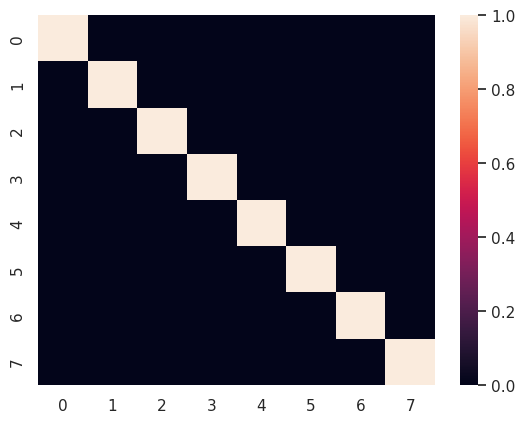

In [190]:
eigen_vector_basis = hyperplans(data, 8)[1]
print(pd.DataFrame(eigen_vector_basis))

sns.heatmap(np.dot(eigen_vector_basis,
            np.transpose(eigen_vector_basis)))
plt.show()

## Partie 2 - Qualité de l'ACP

3. Bar plot pour choisir les axes principales


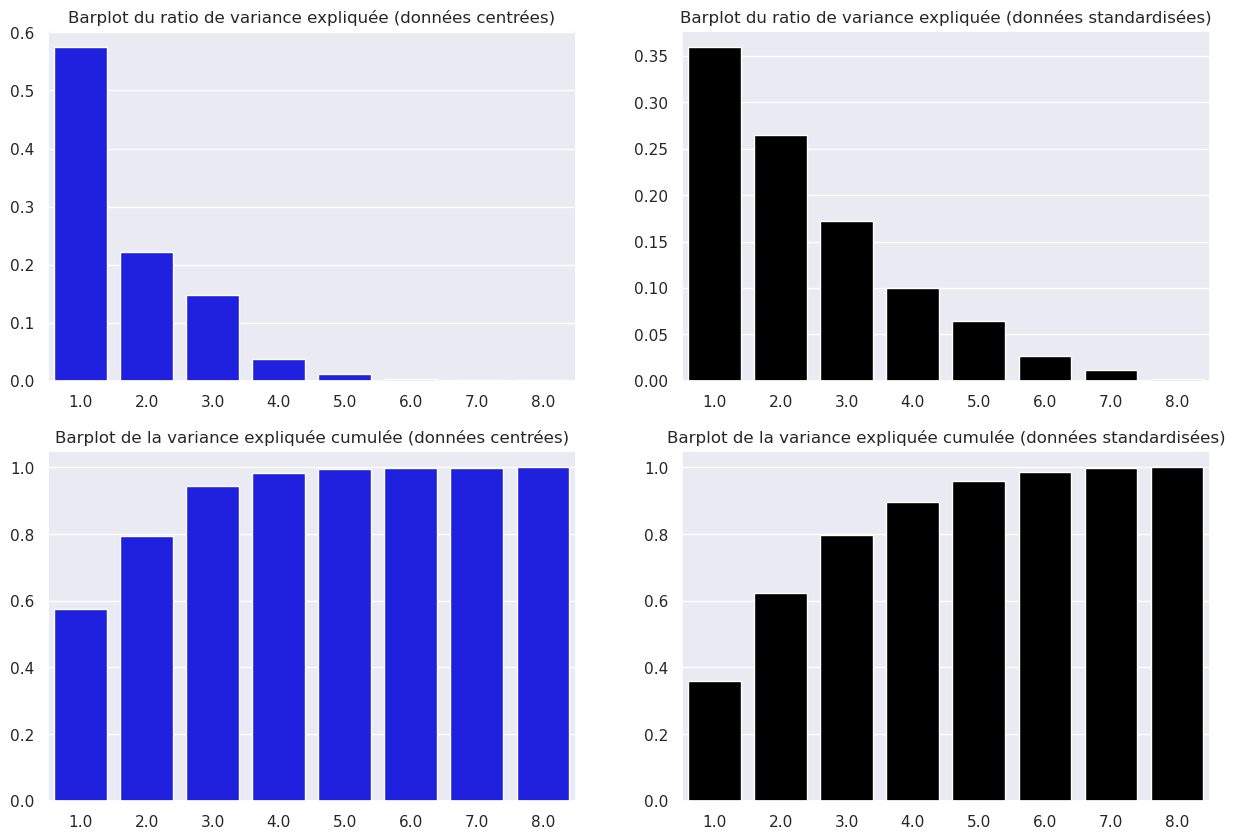

In [191]:
eig_val_centred_data, eig_vect_centred_data = hyperplans(data_centered, data_centered.shape[1])
eig_val_standard_data, eig_vect_standard_data = hyperplans(data_centered_reduced, data_centered_reduced.shape[1])

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.barplot(x = np.linspace(start=1, stop=8, num=8),
            y = eig_val_centred_data / sum(eig_val_centred_data),
            color = 'blue', ax = ax1).set_title('Barplot du ratio de variance expliquée (données centrées)', fontsize=12)

sns.barplot(x = np.linspace(start=1, stop=8, num=8),
            y = eig_val_standard_data / sum(eig_val_standard_data),
            color = 'black', ax=ax2).set_title('Barplot du ratio de variance expliquée (données standardisées)', fontsize=12)

sns.barplot(x = np.linspace(start=1, stop=8, num=8),
            y = np.cumsum(eig_val_centred_data / sum(eig_val_centred_data)),
            color = 'blue', ax = ax3).set_title('Barplot de la variance expliquée cumulée (données centrées)', fontsize=12)

sns.barplot(x = np.linspace(start=1, stop=8, num=8),
            y = np.cumsum(eig_val_standard_data / sum(eig_val_standard_data)),
            color = 'black', ax = ax4).set_title('Barplot de la variance expliquée cumulée (données standardisées)', fontsize=12)

plt.show()

Les trois premières valeurs sont elles-mêmes les plus significatives, comme nous pouvons le constater pour les valeurs qui sont soit centrées (en bleu), soit bien réduites (en noir). Ainsi, selon l'ACP, nous pouvons réduire nos huit variables à trois.

4. Nouvelles coordonnées et matrice de qualité.

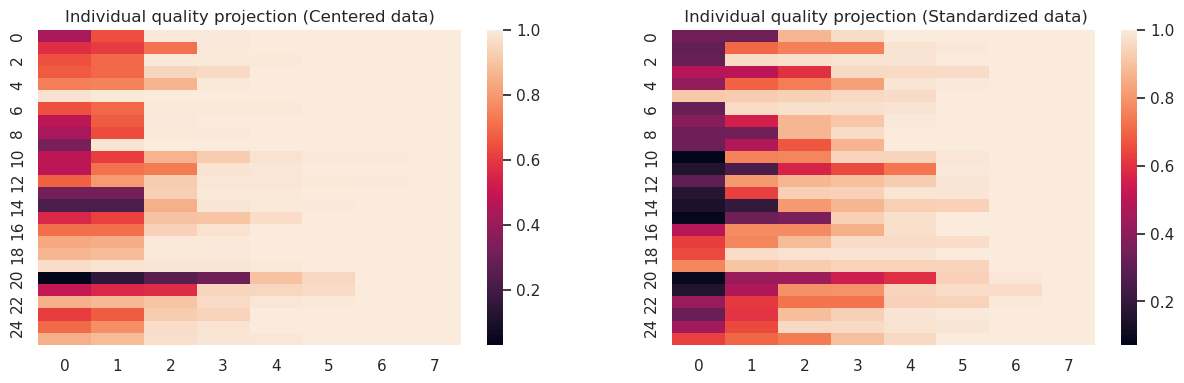

In [192]:
def new_coord(data):
    '''
    On definit les nouvelles coordonnées suivant les hyperplans calculés avant
    '''
    _, eig_vect = hyperplans(data, data.shape[1])
    return np.dot(data, eig_vect)

def individual_quality_projection(coordinates_matrix):
    '''
    This function calculates the quality of each individual projection on 1, 2, ..., p hyperplans
    La formule de qualité peut être interprétée en faisant un simple calcul matriciel
    '''
    individual_quality_projection_matrix = np.dot(np.multiply(coordinates_matrix, coordinates_matrix),
                                                 np.triu(np.ones((coordinates_matrix.shape[1],
                                                                   coordinates_matrix.shape[1]))))

    individual_quality_projection_matrix = np.multiply(individual_quality_projection_matrix,
                                                       np.divide(1.0, individual_quality_projection_matrix[:, -1:]))

    return individual_quality_projection_matrix


coord1 = new_coord(data_centered)
coord2 = new_coord(data_centered_reduced)

quality_centered = individual_quality_projection(coord1)
quality_reduced = individual_quality_projection(coord2)

fig = plt.figure(figsize= (15, 9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.heatmap(quality_centered, ax = ax1).set_title('Individual quality projection (Centered data)', fontsize=12)
sns.heatmap(quality_reduced, ax = ax2).set_title(' Individual quality projection (Standardized data)', fontsize=12)
plt.show()

Une "carte thermique" est plus facile à comprendre. Et la nous constatons que les trois premiers sont aussi les plus significatifs. Et les nous constatons que la qualité est distribuée de manière plus uniforme que les vecteurs purs.

5. Contribution de l'individu

In [193]:
def individual_contribution_matrix(coordinates_matrix):
    n = coordinates_matrix.shape[0]

    # Extract sorted eigen values
    eig_val, _ = hyperplans(pd.DataFrame(coordinates_matrix), coordinates_matrix.shape[1])
    denominator = eig_val * n

    individual_contribution_matrix = np.multiply(coordinates_matrix, coordinates_matrix)

    individual_contribution_matrix = np.multiply(individual_contribution_matrix, np.divide(1.0, denominator))

    return individual_contribution_matrix

individual_contribution_centered_data = individual_contribution_matrix(coord1)
individual_contribution_standardized_data = individual_contribution_matrix(coord2)


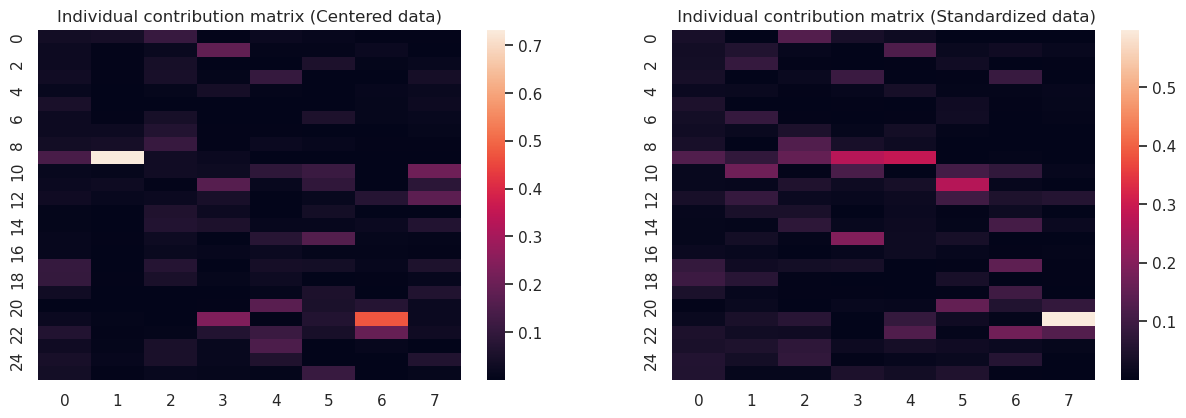

In [194]:
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.heatmap(individual_contribution_centered_data, ax = ax1).set_title('Individual contribution matrix (Centered data)',fontsize=12)
sns.heatmap(individual_contribution_standardized_data, ax = ax2).set_title(' Individual contribution matrix (Standardized data)', fontsize=12) 
plt.show()

6. Comparaison avec ACP.

In [195]:
from sklearn.decomposition import PCA

pca_center = PCA()
pca_center.fit(data_centered)
pd.DataFrame(pca_center.components_.transpose())

,0,1,2,3,4,5,6,7
0,0.605395,-0.460576,0.358994,0.296908,0.225960,0.006081,0.391084,0.017140
1,-0.050085,0.145526,-0.192659,-0.564511,0.604647,-0.010916,0.503727,0.032638
2,-0.010371,0.016962,0.023002,-0.101135,-0.308517,0.640599,0.231258,0.655604
3,0.009834,-0.024161,-0.068854,0.087402,0.140657,-0.623491,-0.151071,0.745380
4,0.280568,0.086156,-0.011420,-0.385747,-0.670406,-0.411831,0.368618,-0.099998
5,-0.060801,-0.048967,-0.755556,0.511207,-0.079480,-0.018210,0.390375,-0.051636
6,-0.591480,0.199047,0.503491,0.313874,-0.044240,-0.166773,0.478158,-0.010281
7,-0.445556,-0.846392,-0.065095,-0.258176,-0.103244,-0.054638,0.010129,-0.021463


Same eigen vectors as the ones we got for the centered data as calculated previously.

7. Nuage des points.

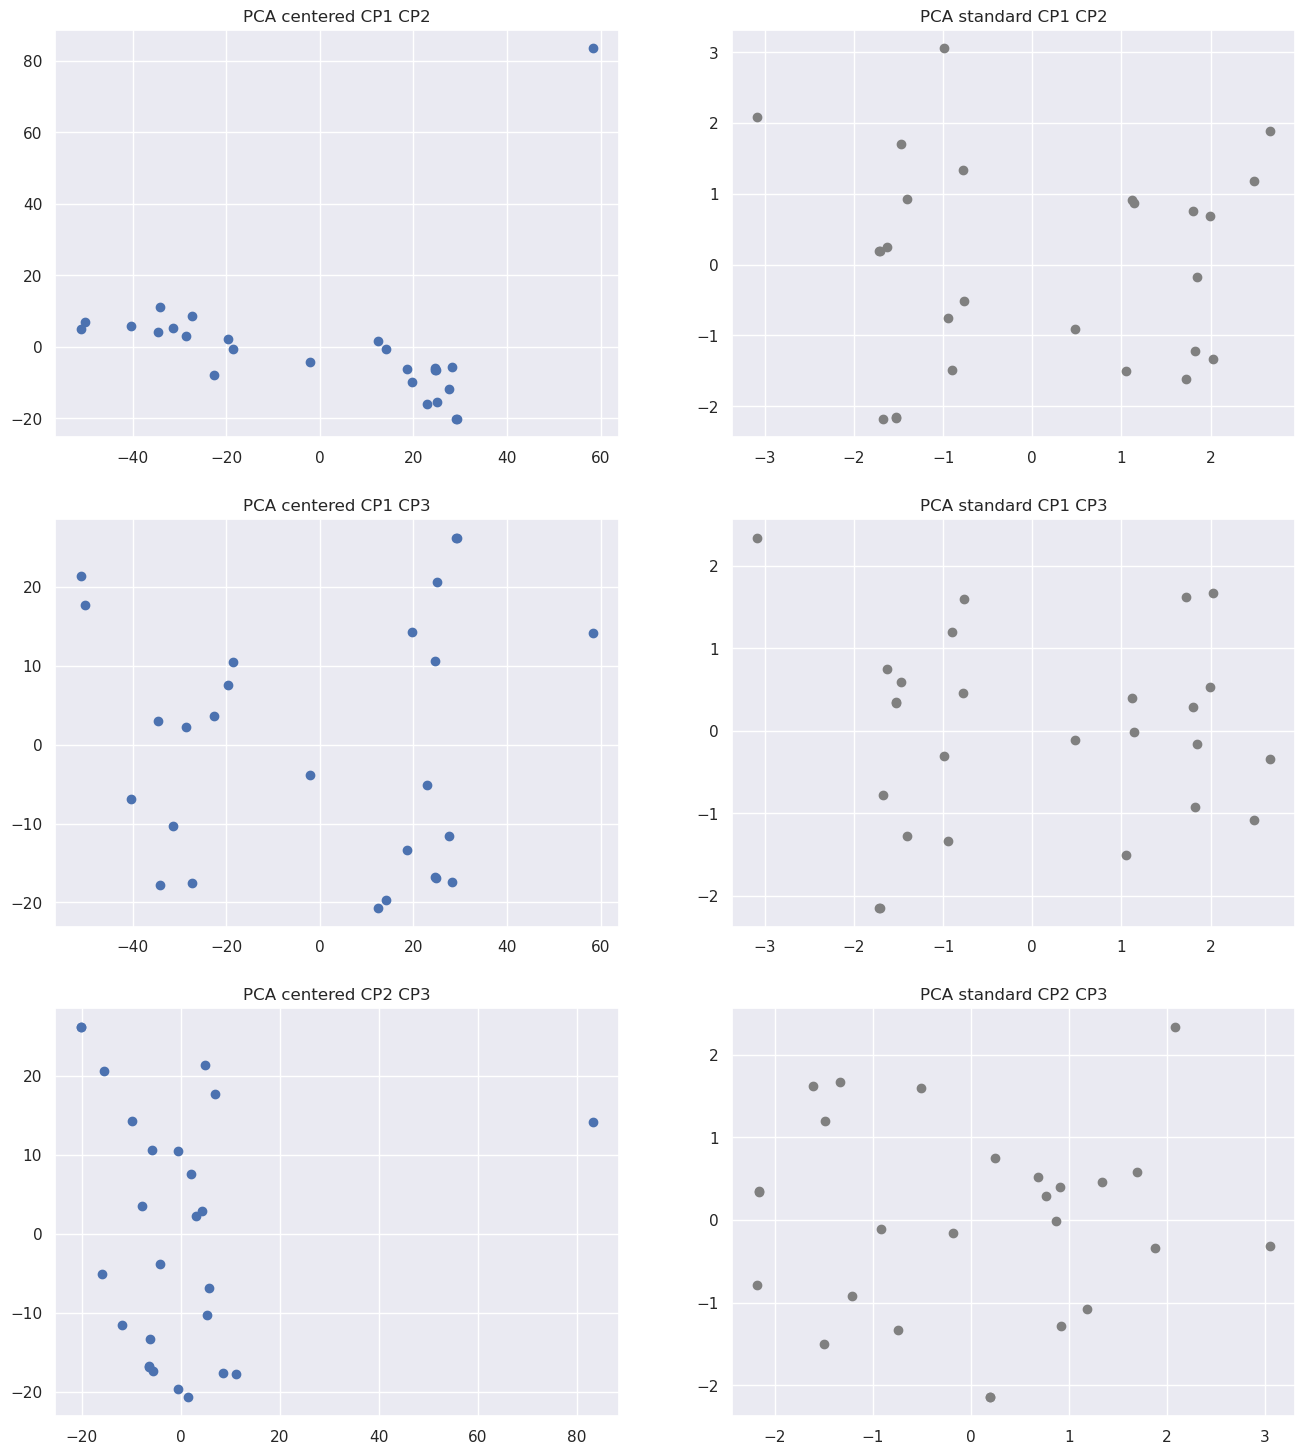

In [196]:
PCA_centered = new_coord(data_centered)
PCA_standard = new_coord(data_centered_reduced)

fig = plt.figure(figsize= (16, 18))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.scatter(PCA_centered[:, 0], PCA_centered[:, 1])
ax1.set_title('PCA centered CP1 CP2')

ax3.scatter(PCA_centered[:, 0], PCA_centered[:, 2])
ax3.set_title('PCA centered CP1 CP3')

ax5.scatter(PCA_centered[:, 1], PCA_centered[:, 2])
ax5.set_title('PCA centered CP2 CP3')

ax2.scatter(PCA_standard[:, 0], PCA_standard[:, 1],  c='gray')
ax2.set_title('PCA standard CP1 CP2')

ax4.scatter(PCA_standard[:, 0], PCA_standard[:, 2],  c='gray')
ax4.set_title('PCA standard CP1 CP3')

ax6.scatter(PCA_standard[:, 1], PCA_standard[:, 2],  c='gray')
ax6.set_title('PCA standard CP2 CP3')

plt.show()

Nous pouvons regarder que nous avons des nuages des points différents entre les données centrées et les données réduites. Nous remarquons qu'il existe une relation entre les variables dans le cas PCA centralisés.

## Partie 3 - Etude de la forme du nuage initiale et réduction de dimension

#### Nuage Isotropes

In [197]:
V = np.random.normal(0, 1, (1000, 3))
V = pd.DataFrame(V)/np.linalg.norm(V)

V.columns = ['x', 'y', 'z']

fig = px.scatter_3d(V , x='x', y='y', z='z', opacity=0.3)
fig.show()

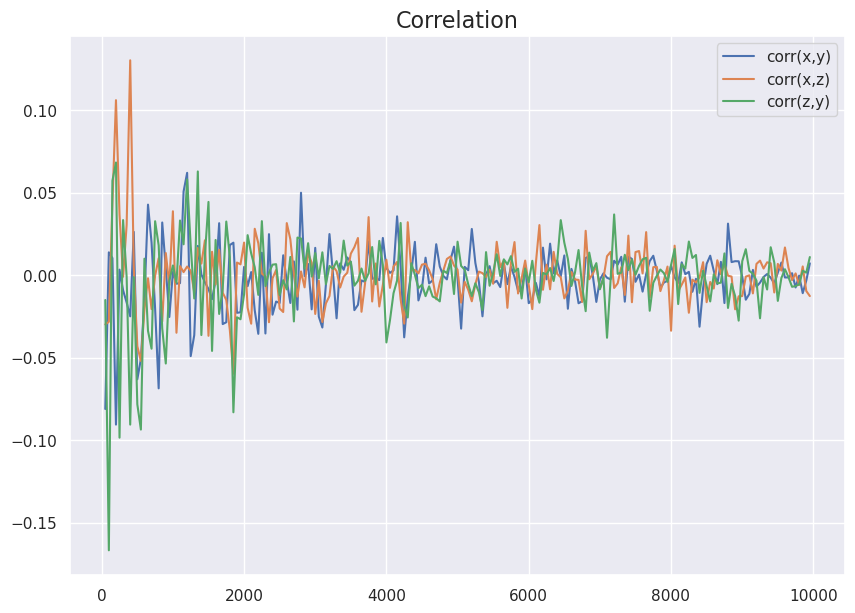

In [198]:
def generate_isotrope_cor(sample_size):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)/np.linalg.norm(V)
    cor_V = np.corrcoef(np.transpose(V))

    return [cor_V[0, 1], cor_V[0, 2], cor_V[1, 2]]

corr = np.asarray([generate_isotrope_cor(sample_size=k) for k in range(1, 10000, 50)])
corr = pd.DataFrame(corr)
corr.columns = ['corr(x,y)', 'corr(x,z)', 'corr(z,y)']

plt.figure(figsize = (10, 7))
plt.plot(range(1, 10000 , 50),corr)
plt.legend(['corr(x,y)', 'corr(x,z)', 'corr(z,y)'])
plt.title('Correlation', size=16)
plt.show()

Nous voyons qu'avec l'augmentation de nombres d'observation, les 3 composants sont moins corrélés.

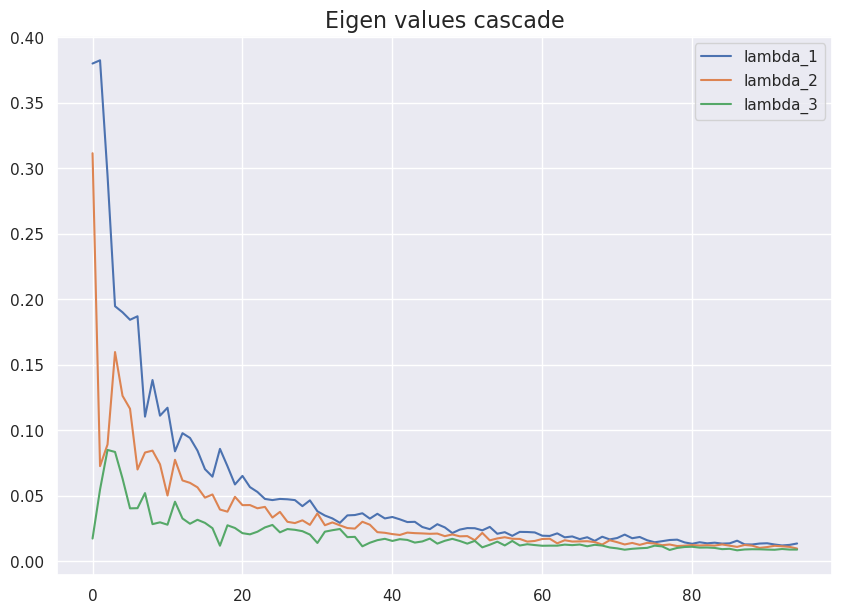

In [199]:
def eigen_values_cascade(sample_size):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V) / np.linalg.norm(V)
    V.columns = ['x', 'y', 'z']

    V_eigen_values = hyperplans(V, 3)[0]
    return V_eigen_values

eigen_cascade = np.asarray([eigen_values_cascade(k) for k in range(5, 100)])
eigen_cascade = pd.DataFrame(eigen_cascade)/np.linalg.norm(eigen_cascade)
eigen_cascade.columns = ['lambda_1', 'lambda_2', 'lambda_3']
plt.figure(figsize = (10, 7))
plt.plot(eigen_cascade)
plt.legend(['lambda_1', 'lambda_2', 'lambda_3'])
plt.title('Eigen values cascade', size=16)
plt.show()

Même remarque pour les valeurs propres

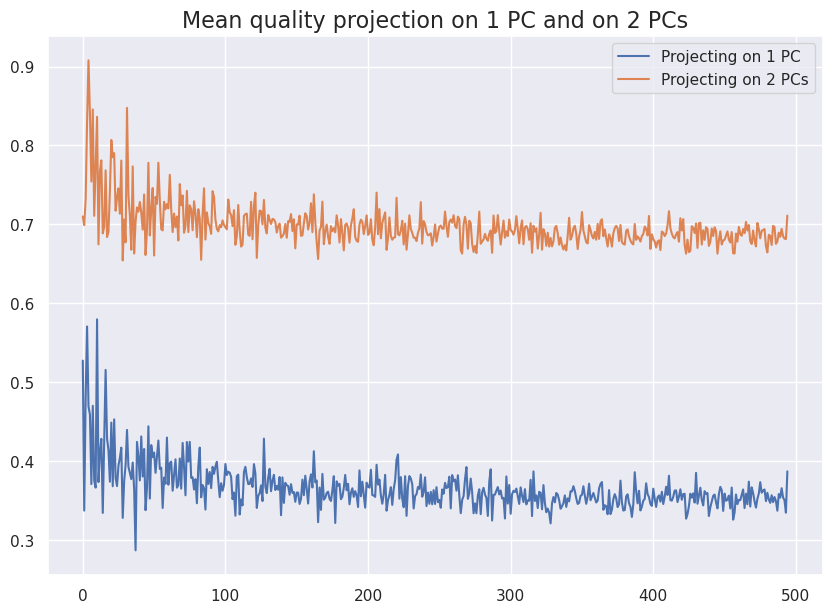

In [200]:
def individual_quality_projection_stabilization(sample_size):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)/np.linalg.norm(V)
    V.columns = ['x', 'y', 'z']
    individual_quality_projection_matrix = individual_quality_projection(new_coord(V))
    mean_projection_on_1 = np.mean(individual_quality_projection_matrix[:, 0])
    mean_projection_on_2 = np.mean(individual_quality_projection_matrix[:, 1])

    return [mean_projection_on_1, mean_projection_on_2]

quality = np.asarray([individual_quality_projection_stabilization(k) for k in range(5, 500)])
quality = pd.DataFrame(quality)

plt.figure(figsize = (10, 7))
plt.plot(quality)
plt.title('Mean quality projection on 1 PC and on 2 PCs', size=16)
plt.legend(['Projecting on 1 PC', 'Projecting on 2 PCs'])
plt.show()

C'est claire que avec l'augmentation du nombre d'observation, la qualité moyenne se stabilize et atteint 33% pour une projection sur 1 seul axe et 66% pour une projection sur 2 axes.

#### Nuage *non Isotropes*

In [201]:
V = np.random.normal(0, 1, (900, 3))
V = pd.DataFrame(V)

V.columns = ['x', 'y', 'z']
V['x'] = np.sort(V['x'])
V['z'] = V['z'] + np.arctan2(V['x'], V['y'])

V = pd.DataFrame(V)/np.linalg.norm(V)


fig = px.scatter_3d(V , x='x', y='y', z='z', opacity=0.3)
fig.show()

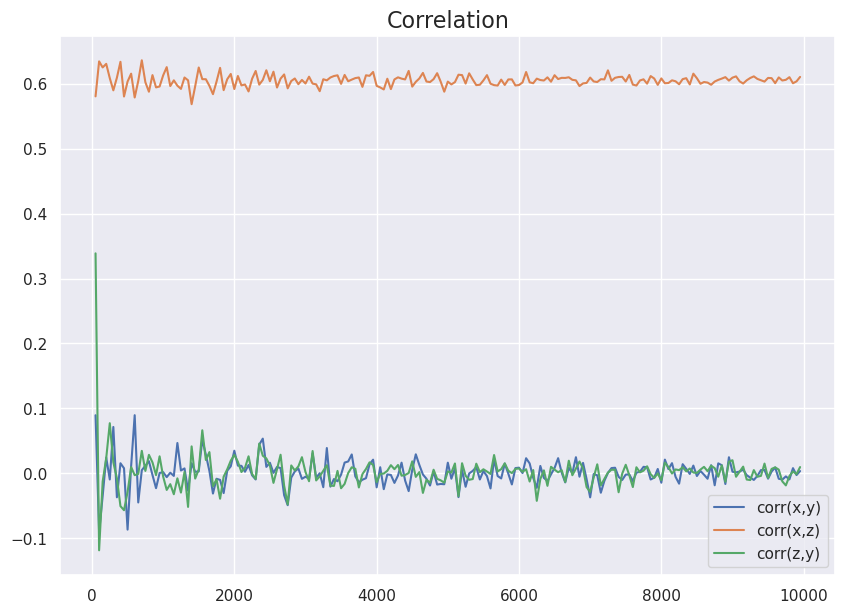

In [202]:
def generate_non_isotrope_cor(sample_size):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)

    V.columns = ['x', 'y', 'z']
    V['x'] = np.sort(V['x'])
    V['z'] = V['z'] + np.arctan2(V['x'], V['y'])

    V = pd.DataFrame(V) / np.linalg.norm(V)

    cor_V = np.corrcoef(np.transpose(V))

    return [cor_V[0, 1], cor_V[0, 2], cor_V[1, 2]]

corr = np.asarray([generate_non_isotrope_cor(sample_size=k) for k in range(1, 10000 , 50)])
corr = pd.DataFrame(corr)
corr.columns = ['corr(x,y)', 'corr(x,z)', 'corr(z,y)']

plt.figure(figsize = (10, 7))
plt.plot(range(1, 10000, 50),corr)
plt.title('Correlation', size=16)
plt.legend(['corr(x,y)', 'corr(x,z)', 'corr(z,y)'])
plt.show()


Les corrélations sont très fortes toujours.

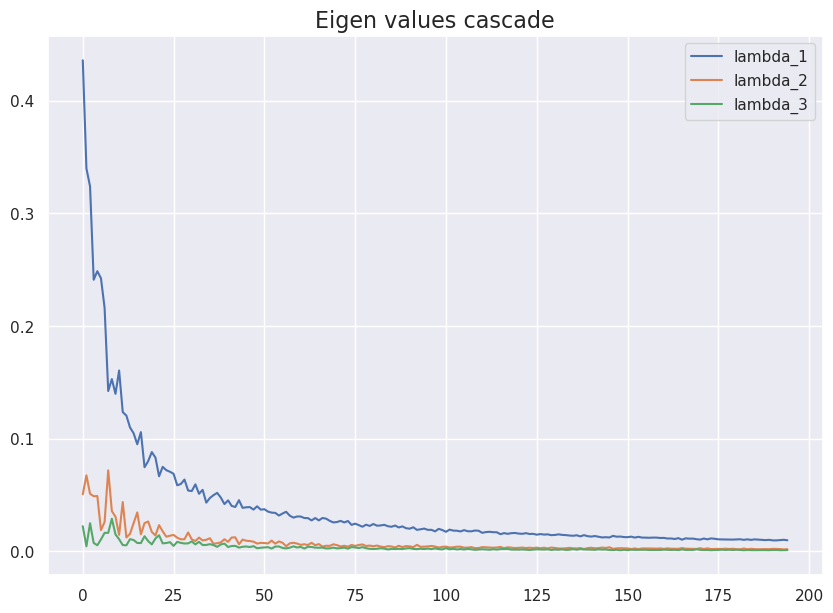

In [203]:
def eigen_values_cascade(sample_size=3):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)

    V.columns = ['x', 'y', 'z']
    V['x'] = np.sort(V['x'])
    V['z'] = V['z'] + np.arctan2(V['x'], V['y'])
    
    V = pd.DataFrame(V) / np.linalg.norm(V)

    V_eigen_values = hyperplans(V, 3)[0]

    return V_eigen_values

eigen_cascade = np.asarray([eigen_values_cascade(k) for k in range(5, 200)])
eigen_cascade = pd.DataFrame(eigen_cascade)/np.linalg.norm(eigen_cascade)
eigen_cascade.columns = ['lambda_1', 'lambda_2', 'lambda_3']

plt.figure(figsize = (10, 7))
plt.plot(eigen_cascade)
plt.title('Eigen values cascade', size=16)
plt.legend(['lambda_1', 'lambda_2', 'lambda_3'])
plt.show()

Lambda_2 et Lambda_3 sont presque nulles quand le nombre de points est grand à cause de la correlation entre les variables.

Seul lambda_1 a une valeur > 0 quand le nombre de points est grand.

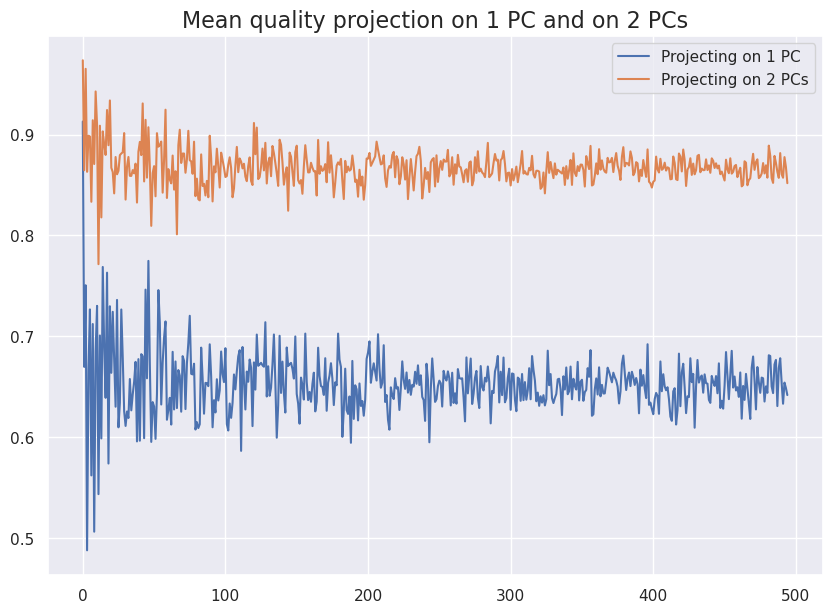

In [204]:
def individual_quality_projection_stabilization(sample_size=3):
    V = np.random.normal(0, 1, (sample_size, 3))
    V = pd.DataFrame(V)

    V.columns = ['x', 'y', 'z']
    V['x'] = np.sort(V['x'])
    V['z'] = V['z'] + np.arctan2(V['x'], V['y'])
    V = pd.DataFrame(V) / np.linalg.norm(V)

    mean_projection_PC1 = np.mean(individual_quality_projection(new_coord(V))[:, 0])
    mean_projection_PC2 = np.mean(individual_quality_projection(new_coord(V))[:, 1])

    return [mean_projection_PC1, mean_projection_PC2]

corr_stablization = np.asarray([individual_quality_projection_stabilization(k) for k in range(5, 500)])
corr_stablization = pd.DataFrame(corr_stablization)
corr_stablization.columns = ['PC1', 'PC1_and2']

plt.figure(figsize = (10, 7))
plt.plot(corr_stablization)
plt.title('Mean quality projection on 1 PC and on 2 PCs', size=16)
plt.legend(['Projecting on 1 PC', 'Projecting on 2 PCs'])
plt.show()

Une projection sur 1 axe principal explique entre 60% et 70% de la variance.

Une projection sur 2 axes principal explique plus que 85% des informations.

#### Points extrémaux

In [205]:
V = np.random.normal(0, 1, (900, 3))
V = pd.DataFrame(V)

V.columns = ['x', 'y', 'z']
V['x'] = np.sort(V['x'])
V['z'] = V['z'] + np.arctan2(V['x'], V['y'])
V = pd.DataFrame(V)/np.linalg.norm(V)

V_with_outliers = V.copy()
outliers = pd.DataFrame([[100, 0, 0]], columns=['x', 'y', 'z'])
V_with_outliers = V_with_outliers.add(outliers, fill_value=0)
V_with_outliers = V_with_outliers - V_with_outliers.mean()

fig = px.scatter_3d(V_with_outliers , x='x', y='y', z='z', opacity=0.3)
fig.show()


In [206]:
eigen_values, eigen_vectors = hyperplans(V_with_outliers, 3)
first_principal_component = eigen_vectors[:, 0]
print("Eigen values: ", eigen_values)
print("First principal component: ", first_principal_component.round(3))

Eigen values:  [1.11018312e+01 7.84084122e-04 1.62120748e-04]
First principal component:  [ 1.  0. -0.]


In [207]:
V_with_outliers_standardized = V_with_outliers.copy()
V_with_outliers_standardized = (V_with_outliers_standardized - V_with_outliers_standardized.mean()) / V_with_outliers_standardized.std()
eigen_values, eigen_vectors = hyperplans(V_with_outliers_standardized, 3)
first_principal_component = eigen_vectors[:, 0]
print("Eigen values: ", eigen_values)
print("First principal component: ", first_principal_component.round(3))

Eigen values:  [1.02172155 0.99933969 0.97893875]
First principal component:  [ 0.701  0.242 -0.671]


Comme nous pouvons le voir, dans le cas de données centrées (et non centrées), la première composante primaire, qui représente la majorité de la variance, est entièrement orientée vers le point décentré [100, 0, 0], l'ACP est alors affecté par les valeurs aberrantes. Alors que dans le cas de données normées, l'effet est réduit: la première n'est plus tirée vers le point décentré, mais on a perdu les correlations, alors il faut penser à régler le problémes des points aberrants.

## Partie 4. Etude de la forme du nuage initiale sur la réduction de dimension dans les deux espaces

Nuage Isotrope 

In [271]:
V = np.random.normal(0, 1, (900, 3))
V = pd.DataFrame(V)/np.linalg.norm(V)

V_p = pd.DataFrame(V)
V_n = pd.DataFrame(np.transpose(V))

V_p_eigen_values, V_p_eigen_vectors = hyperplans(V_p, k=3)
V_n_eigen_values, V_n_eigen_vectors = hyperplans(V_n, k=900)

print("The eigen values for the Rp problem are:")
print(V_p_eigen_values)
print("\n")
print("The eigen values (truncated as shape p) for the Rn problem are:")
print(V_n_eigen_values[0:3].astype(float))

The eigen values for the Rp problem are:
[0.00038769 0.0003846  0.00033929]


The eigen values (truncated as shape p) for the Rn problem are:
[1.73351768e-01 1.53132266e-01 7.50053903e-18]


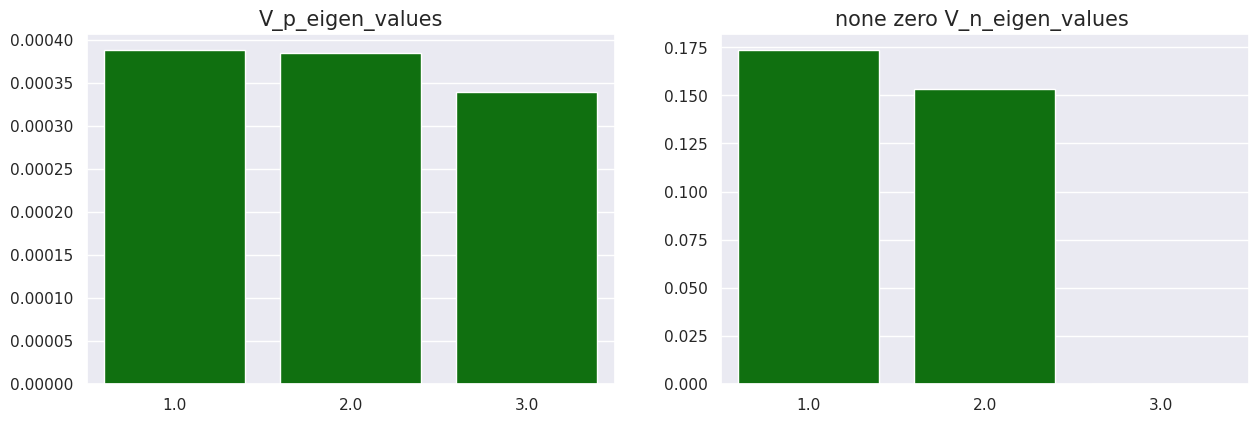

In [272]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.barplot(x=np.linspace(start=1, stop=3, num=3),
            y=V_p_eigen_values,
            color='green',
            ax=ax1).set_title('V_p_eigen_values', fontsize=15)

sns.barplot(x=np.linspace(start=1, stop=3, num=3),
            y=V_n_eigen_values[:3],
            color = 'green', ax=ax2).set_title('none zero V_n_eigen_values ', fontsize=15)
plt.show()

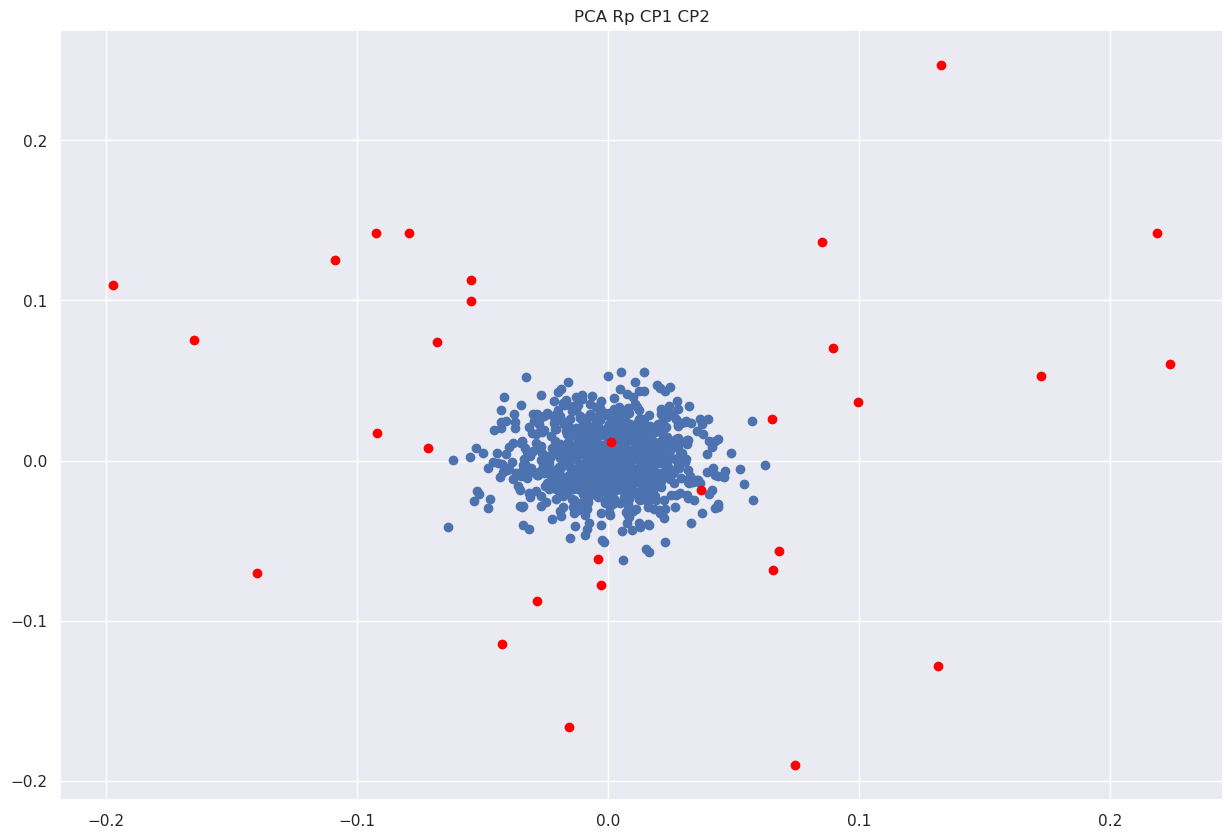

In [273]:
X_p_new_coord_isotrope = np.dot(V_p, V_p_eigen_vectors)

new_V = np.random.normal(0, 1, (30, 3))
new_V = pd.DataFrame(new_V)/np.linalg.norm(new_V)

new_V_p = pd.DataFrame(new_V)
additional_point = np.dot(new_V_p, V_p_eigen_vectors)

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_p_new_coord_isotrope[:, 0], X_p_new_coord_isotrope[:, 1])
ax1.scatter(additional_point[:30, 0], additional_point[:30, 1], c='red')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()

Les points en rouges montrent les nouvelles observations.

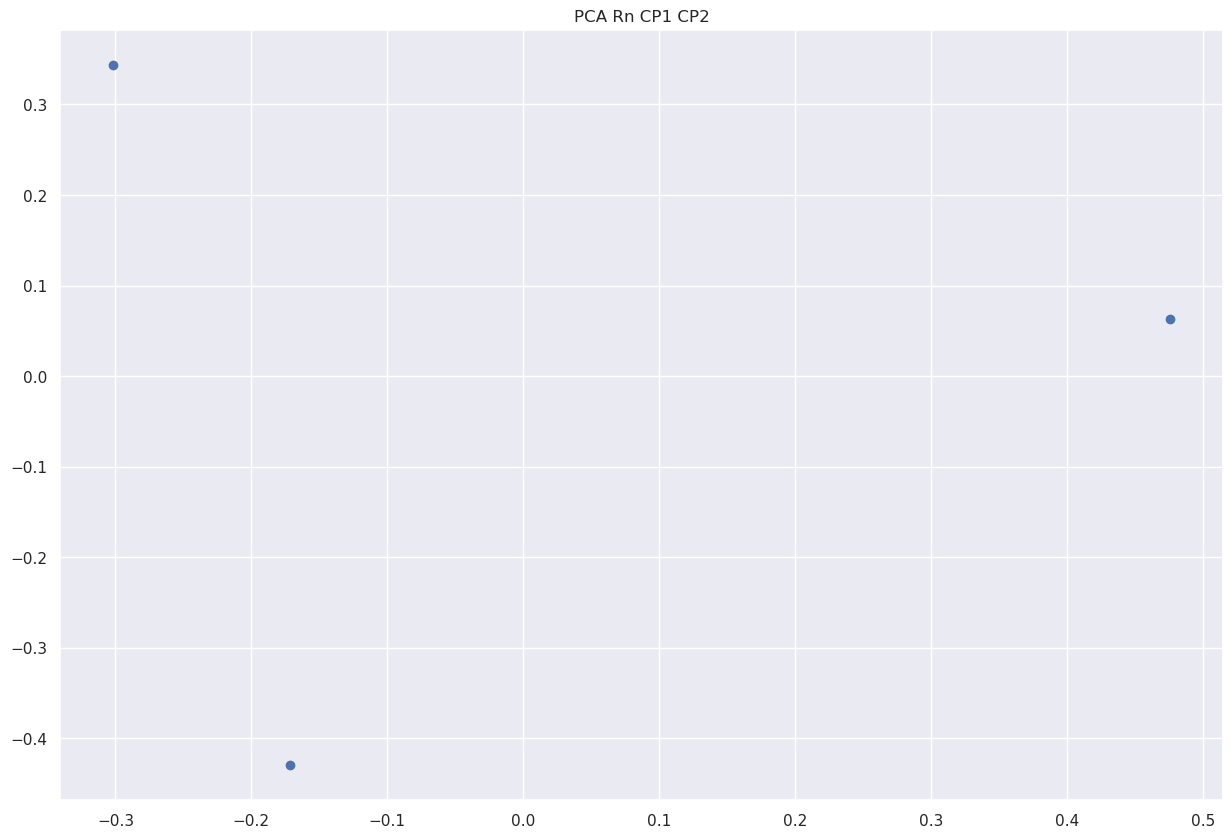

In [280]:
X_n_new_coord_isotrope = np.dot(V_n, V_n_eigen_vectors)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_n_new_coord_isotrope[:, 0], X_n_new_coord_isotrope[:, 1])
ax1.set_title('PCA Rn CP1 CP2')
plt.show()

Formule de passage

The sum of absolute differences between the V_p_eigen_vectors and the vectors calculated is:
0.7961


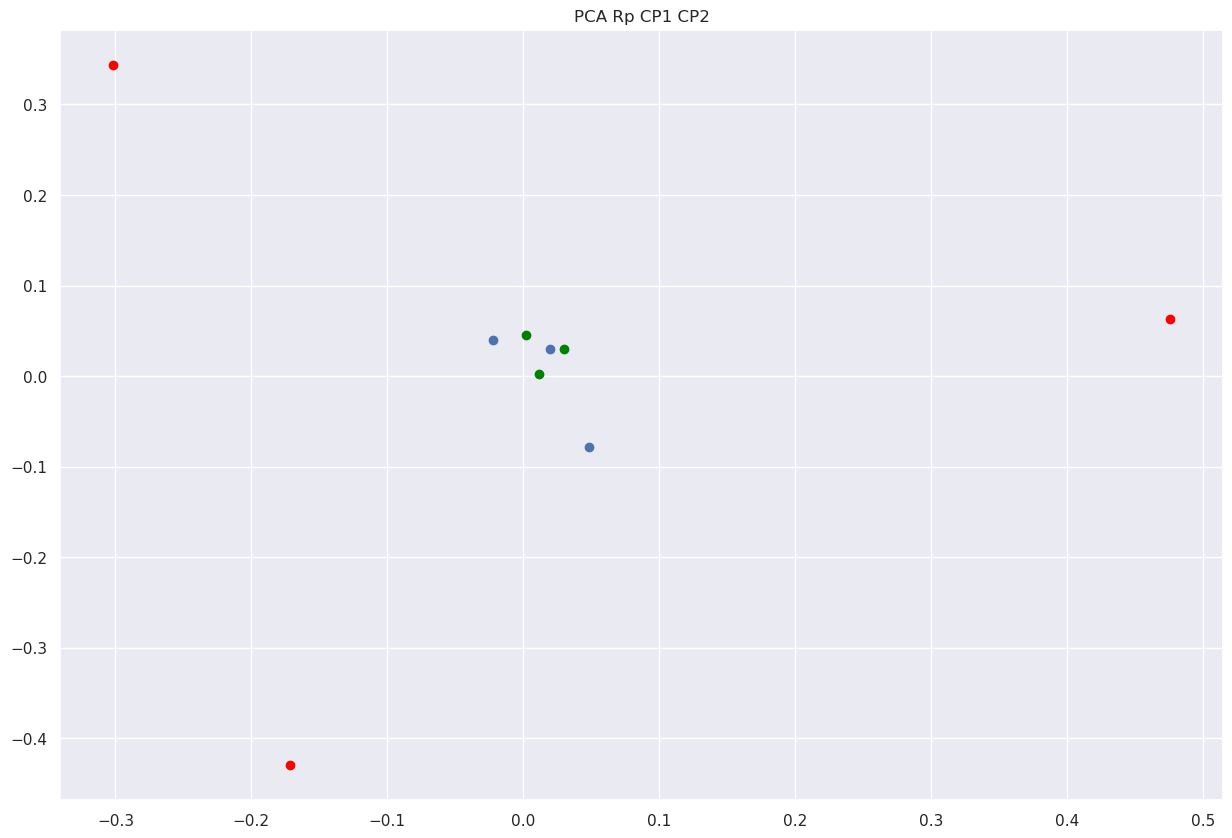

In [284]:
estimated_dual_vectors = np.zeros(V_n_eigen_vectors.shape)
for i in range(V_p_eigen_vectors.shape[0]):
    estimated_dual_vectors[i] = np.dot(V_p, np.transpose(V_p_eigen_vectors)[i]) / np.sqrt(V_p_eigen_values[i])
print('The sum of absolute differences between the V_p_eigen_vectors and the vectors calculated is:')
print(round(np.mean(abs(estimated_dual_vectors[:3]) - abs(V_n_eigen_vectors[:3].astype(float))), 4))

estimated_projection = np.dot(V_n, estimated_dual_vectors)

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(estimated_projection[:, 0], estimated_projection[:, 1])
ax1.scatter(X_n_new_coord_isotrope[:, 0], X_n_new_coord_isotrope[:, 1], c='red')
ax1.scatter(additional_point[:, 0], additional_point[:, 1], c='green')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()

Les points en blue sont projetés en utilisant les vecteurs estimés, ceux en rouges sont les originales, et ceux en vert sont les points additionnels.

Nuage Non isotrope 

In [213]:
V = np.random.normal(0, 1, (900, 3))
V = pd.DataFrame(V)

V.columns = ['x', 'y', 'z']
V['x'] = np.sort(V['x'])
V['z'] = V['z'] + np.arctan2(V['x'], V['y'])
V = pd.DataFrame(V)/np.linalg.norm(V)
V_p = pd.DataFrame(V)
V_n = pd.DataFrame(np.transpose(V_p))

V_p_eigen_values, V_p_eigen_vectors = hyperplans(V_p, k=3)
V_n_eigen_values, V_n_eigen_vectors = hyperplans(V_n, k=900)

print("The eigen values for the Rp problem are:")
print(V_p_eigen_values)

print("\n")
print("The eigen values (truncated as shape p) for the Rn problem are:")
print(V_n_eigen_values[0:3].astype(float))

The eigen values for the Rp problem are:
[0.00082343 0.00018593 0.00010277]


The eigen values (truncated as shape p) for the Rn problem are:
[2.16154621e-01 5.79760636e-02 8.77324541e-18]


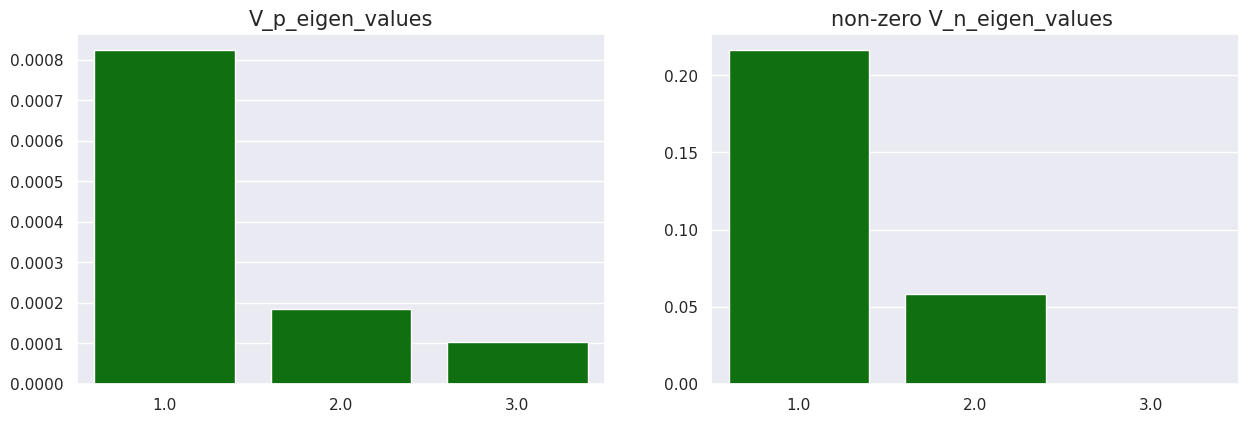

In [214]:
fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.barplot(x=np.linspace(start=1, stop=3, num=3),
            y=V_p_eigen_values,
            color = 'green',
            ax=ax1).set_title('V_p_eigen_values', fontsize=15)

sns.barplot(x=np.linspace(start=1, stop=3, num=3),
            y=V_n_eigen_values[:3],
            color = 'green', ax=ax2).set_title('non-zero V_n_eigen_values ', fontsize=15)
plt.show()

X_p_new_coord_non_isotrope = np.transpose(np.dot(V_p_eigen_vectors, np.transpose(np.array(V_p))))

Comme nous le voyons dans le cas d'un nuage de points non isotrope, la première composante principale est très grande par rapport au cas isotrope, ceci parce que le premier (isotrope) vérifie l'uniformité dans toutes les orientations, tandis que dans le cas non isotrope il y a une direction qui détient une grande partie de la variance totale qui est le premier composant principal.

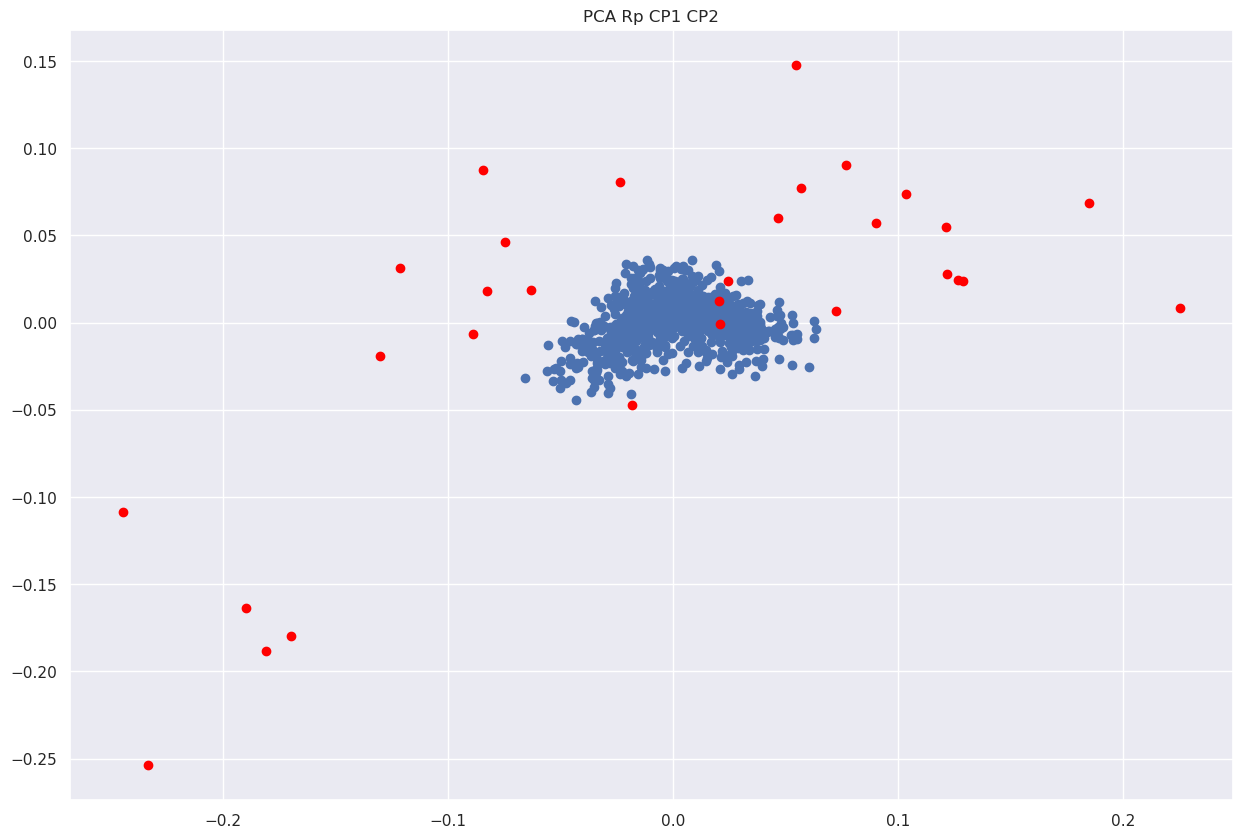

In [291]:
new_V = np.random.normal(0, 1, (30, 3))
new_V = pd.DataFrame(new_V)

new_V.columns = ['x', 'y', 'z']
new_V['x'] = np.sort(new_V['x'])
new_V['z'] = new_V['z'] + np.arctan2(new_V['x'], new_V['y'])
new_V = pd.DataFrame(new_V)/np.linalg.norm(new_V)
new_V_n = pd.DataFrame(np.transpose(new_V_p))

new_V = pd.DataFrame(new_V)/np.linalg.norm(new_V)

new_V_p = pd.DataFrame(new_V)
additional_point = np.dot(new_V_p, V_p_eigen_vectors)

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_p_new_coord_non_isotrope[:, 0], X_p_new_coord_non_isotrope[:, 1])
ax1.scatter(additional_point[:, 0], additional_point[:, 1], c='red')
ax1.set_title('PCA Rp CP1 CP2')
plt.show()

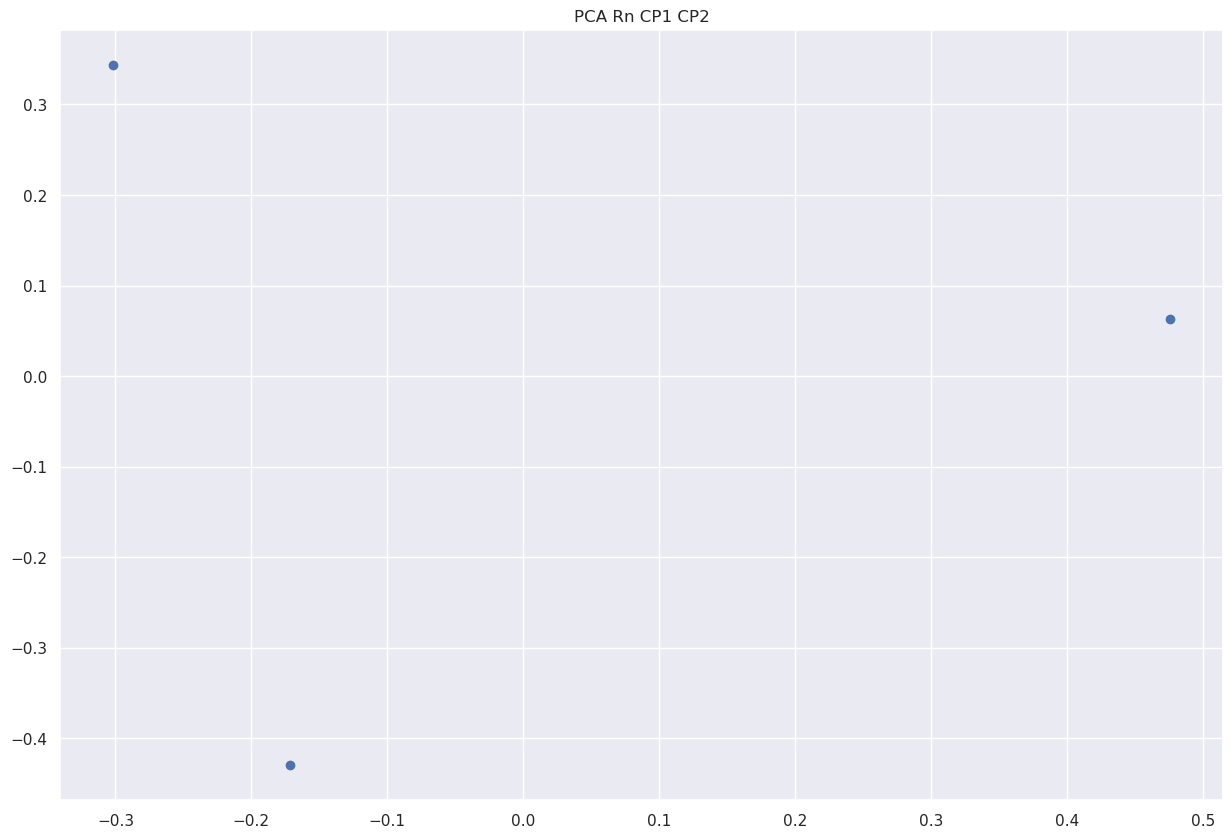

In [293]:
X_n_new_coord_non_isotrope = np.dot(V_n, V_n_eigen_vectors)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(X_n_new_coord_non_isotrope[:, 0], X_n_new_coord_non_isotrope[:, 1])
ax1.set_title('PCA Rn CP1 CP2')
plt.show()

Formule de passage

The sum of absolute differences between the V_p_eigen_vectors and the vectors calculated is:
0.8215


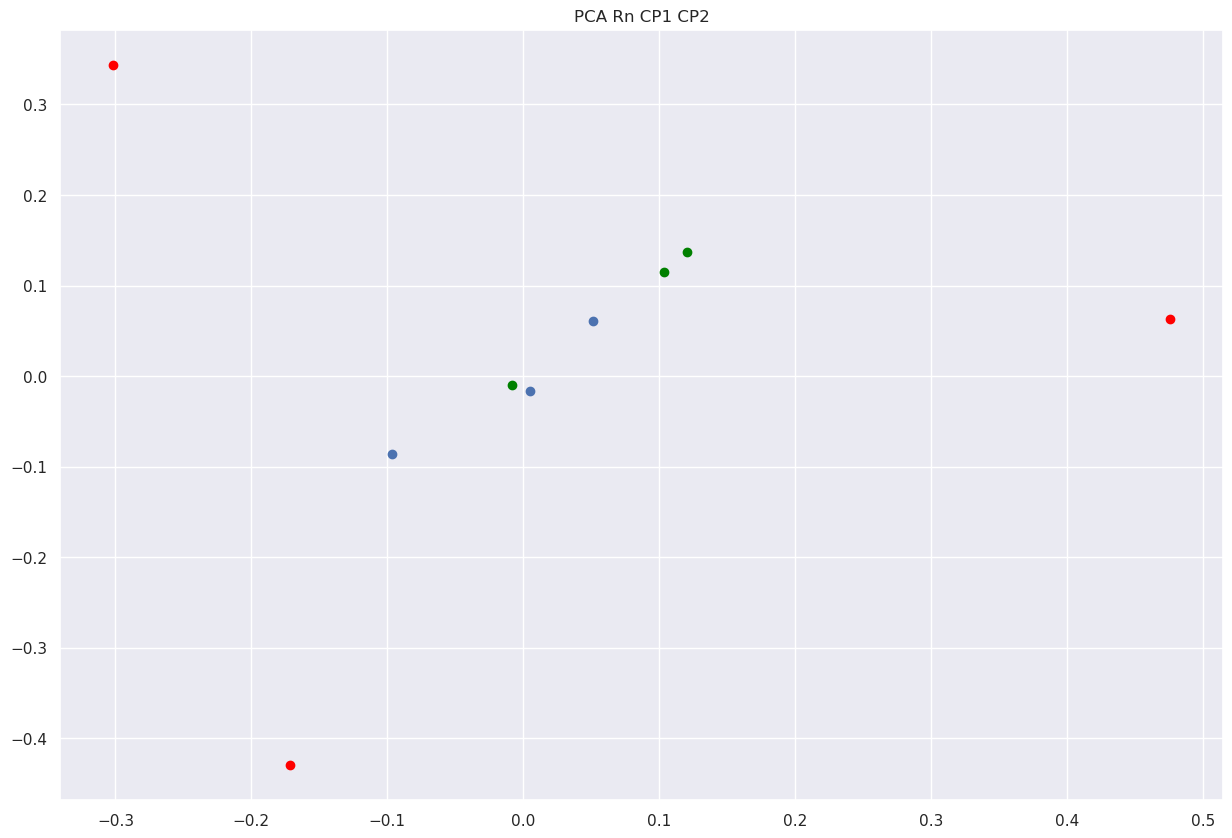

In [295]:
estimated_dual_vectors = np.zeros(V_n_eigen_vectors.shape)
for i in range(V_p_eigen_vectors.shape[0]):
    estimated_dual_vectors[i] = np.dot(V_p, np.transpose(V_p_eigen_vectors)[i]) / np.sqrt(V_p_eigen_values[i])
print('The sum of absolute differences between the V_p_eigen_vectors and the vectors calculated is:')
print(round(np.mean(abs(estimated_dual_vectors[:3]) - abs(V_n_eigen_vectors[:3].astype(float))), 4))

estimated_projection = np.dot(V_n, estimated_dual_vectors)

new_V = np.random.normal(0, 1, (900, 3))
new_V = pd.DataFrame(new_V)

new_V.columns = ['x', 'y', 'z']
new_V['x'] = (6 * new_V['x'] + -15 * new_V['y'])
new_V['z'] = (3 * new_V['z'] + -12 * new_V['y'])
new_V = pd.DataFrame(new_V)/np.linalg.norm(new_V)
new_V = pd.DataFrame(new_V)
new_V_n = pd.DataFrame(np.transpose(new_V))

new_V_n = np.transpose(new_V)
additional_point = np.dot(new_V_n, estimated_dual_vectors)

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(estimated_projection[:, 0], estimated_projection[:, 1])
ax1.scatter(X_n_new_coord_non_isotrope[:, 0], X_n_new_coord_non_isotrope[:, 1], c='red')
ax1.scatter(additional_point[:, 0], additional_point[:, 1], c='green')
ax1.set_title('PCA Rn CP1 CP2')
plt.show()

À mesure que le nombre de dimensions augmente, la variance totale des données peut se disperser sur un plus grand nombre de composantes. Cela signifie que chaque composante individuelle explique une proportion plus faible de la variance totale, ce qui peut rendre l'interprétation des résultats plus difficile.

## A - Partie 3

In [296]:
data = pd.read_excel('TP4_covC1234_DS19_20.xlsx', sheet_name='Feuil1')

# Remove the first column
data = data.iloc[:, 1:]

Traitement statistique des donnees

In [297]:
# Missing values represented by `?`
data.replace('?', np.nan, inplace=True)

# Remove the rows with missing values
data.dropna(inplace=True)

data.isnull().sum()

B                 0
T                 0
E                 0
X                 0
9_ane             0
10_ane            0
13_ane            0
14_ane            0
1_M_2_PA          0
BTM               0
FormicAcid        0
aceticacid        0
NonaDecanoicAc    0
Tot_OcNoDecana    0
TYPE              0
SAISON            0
Campagne          0
Localisation      0
dtype: int64

In [298]:
data.describe()

,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,55.549380,208.588759,232.575160,883.284935,104.594599,266.418394,970.644372,1859.411419,311.633183,580.001283,480.422784,342.809075,670.915135,630.614932
std,33.461482,121.211625,430.588450,1235.511663,98.337371,476.821989,1498.088166,2383.823489,584.057749,1919.264999,544.619533,668.040512,775.438631,806.915593
min,0.000000,14.363178,0.000000,77.531698,11.659400,0.000000,0.000000,0.000000,0.000000,36.620813,13.937401,0.000000,0.000000,0.000000
25%,22.995047,122.152279,115.743898,388.862905,52.562905,73.441889,61.251710,70.950959,65.451691,209.225994,57.525405,51.225189,55.616218,137.148926
50%,51.822972,183.940552,152.687395,600.916311,75.211136,177.613572,201.964257,1024.438774,128.358148,317.212636,305.791366,172.396601,282.142846,336.084965
75%,76.072552,254.687341,227.745691,914.492120,121.364608,319.902277,593.251393,1917.443476,375.936027,487.307219,742.841842,358.375749,1202.043049,708.645165
max,138.810642,675.650851,4844.955559,12987.880799,702.239764,5316.464395,5176.410455,10996.742275,5191.044369,21891.220334,3618.024076,5624.216162,2981.690091,4466.795581


In [299]:
# Statistical indicators per `Campagne`, each `Campagne` in a separate table
for camp in data['Campagne'].unique():
    print('Campagne: ', camp)
    display(data[data['Campagne'] == camp].describe())

Campagne:  BF2


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,15.076719,102.754081,63.483194,210.014939,21.916648,36.558748,19.511359,43.447770,21.893003,114.283128,29.842710,12.765096,54.896148,67.671005
std,4.339949,38.150046,26.479410,83.844973,5.655037,13.135273,14.053689,34.987008,19.215836,60.702213,5.407451,7.036442,42.783932,53.233511
min,4.328710,65.709717,24.750344,77.531698,11.659400,17.842155,0.000000,11.190135,3.621062,36.620813,18.309706,3.354260,8.476058,0.000000
25%,13.141371,75.959049,45.107405,151.770654,17.236700,29.310866,12.813849,18.981295,9.054475,61.541217,25.257122,9.075636,19.295741,29.921632
50%,14.586954,87.624831,56.501705,194.284587,23.061192,35.891376,16.892346,29.926052,13.193060,92.425385,30.600086,12.189239,43.303068,53.932507
75%,17.464426,124.869620,75.953068,260.631303,25.697170,42.517963,23.214175,66.307222,25.273019,152.433715,34.509143,14.717507,77.024307,81.262525
max,24.171441,195.537372,121.441805,403.232080,30.461564,69.378070,56.732644,144.386207,72.403314,215.736621,36.768887,34.362957,142.691340,213.637752


Campagne:  BF3


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,19.354274,169.982896,157.683310,433.258081,52.480000,102.494935,55.237776,30.761745,73.203228,307.478029,55.655680,58.402078,66.235082,141.991499
std,3.217718,86.342073,56.201735,106.120372,33.067545,93.065739,31.029644,18.343182,65.632581,169.638767,9.520422,78.961334,35.423214,79.840961
min,13.576782,106.141376,94.339160,305.015268,28.367647,49.437428,0.000000,7.395812,20.490173,167.527980,44.600394,23.675763,24.724491,0.000000
25%,17.536413,132.821531,124.411171,368.219297,35.854005,62.035707,40.274552,16.279505,37.993114,192.069673,48.555423,31.677059,46.025843,102.867248
50%,18.960528,144.912568,135.888513,393.466339,47.063028,71.203366,45.879663,28.339455,49.740404,264.949248,53.666971,39.220981,56.407743,144.972075
75%,20.465743,166.154616,177.610712,469.974052,57.223689,102.634231,66.206243,40.270221,87.873135,336.378769,58.492873,49.669188,84.805660,155.166261
max,26.524218,496.957134,328.866328,726.778450,179.893186,468.416276,148.925129,72.516856,316.020850,763.675034,84.086351,380.073994,165.015790,396.854143


Campagne:  CA1


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,39.859978,235.637253,230.200962,804.572250,88.285788,127.807942,128.860629,379.664485,324.239304,642.791979,386.473397,814.325154,454.248342,348.759627
std,12.794591,110.574471,271.031858,588.737214,35.995389,51.203304,75.589106,228.414015,709.355327,1375.567935,283.804434,1412.607623,286.486088,258.045233
min,0.000000,146.370818,103.607881,450.041130,45.937478,0.000000,0.000000,0.000000,56.470045,205.938279,180.806721,92.793744,82.206227,0.000000
25%,34.771710,184.015900,137.745640,564.283839,67.284298,105.120962,79.281338,218.669881,102.332692,266.801473,217.493759,142.085173,187.755757,173.727136
50%,38.841674,204.256026,162.815074,662.755807,78.001086,120.265739,134.951122,399.151119,135.429651,307.044114,297.308853,192.615457,450.375669,343.348190
75%,45.414072,235.019822,194.974870,766.862490,111.391979,155.516112,157.733336,507.120123,206.106784,420.860016,402.091761,339.061743,603.220232,488.997388
max,68.678793,613.833139,1345.466388,3161.133662,201.590658,221.527718,350.550726,908.691110,3301.128860,6472.325945,1360.139455,5624.216162,1071.785821,870.488320


Campagne:  CA2


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,105.556478,330.473288,523.390675,2083.814435,228.061505,690.685507,3779.349060,5999.949335,834.440265,1450.934957,933.103144,445.092989,954.383625,1888.401752
std,14.954645,136.864151,849.761735,2240.554741,110.899129,915.504764,598.265319,1743.607022,935.850115,3947.517071,175.847156,179.044424,674.366762,939.581127
min,74.521192,161.128847,0.000000,815.017945,118.855935,56.201306,2643.765156,1460.345241,0.000000,228.187017,652.669330,0.000000,0.000000,53.617055
25%,97.093641,230.206031,244.065793,1091.335393,166.788891,397.558904,3293.666108,4966.982356,430.527952,479.319638,840.171341,356.894257,508.321422,1367.140532
50%,103.417565,298.358591,355.473739,1525.627953,208.448495,506.283787,3779.749649,5459.467656,584.132221,585.935021,933.883790,384.981774,1046.247211,1506.475490
75%,112.834768,381.071831,470.177863,2131.892169,258.895869,676.959927,4153.668774,6823.087500,834.153456,914.717950,1000.778018,525.886091,1422.247793,2489.960283
max,138.810642,675.650851,4844.955559,12987.880799,702.239764,5316.464395,5176.410455,10996.742275,5191.044369,21891.220334,1383.805387,875.330690,2161.174659,4466.795581


Campagne:  CA3


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,52.001739,252.191829,171.947333,643.087978,68.959656,249.324598,197.428142,1079.762165,167.674146,329.594021,213.366315,214.477807,165.290178,276.281357
std,6.316959,63.338080,71.478691,228.876783,15.723494,58.790000,96.809514,480.642518,138.023870,158.390298,93.354658,100.623042,154.313387,112.708157
min,40.621814,154.993492,93.927927,347.083206,50.432053,148.468540,0.000000,152.164592,55.562198,80.549567,13.937401,0.000000,0.000000,44.886793
25%,46.337342,207.067805,124.390625,473.660207,55.461089,215.805111,142.606128,752.844086,89.330428,213.706163,184.522538,154.998309,0.000000,206.574381
50%,51.009800,238.540065,165.420604,615.845365,65.561858,240.090290,201.964257,1102.711631,107.973863,318.461581,243.439232,188.655811,166.997980,303.797510
75%,58.563187,278.628749,205.647213,802.731156,76.300073,272.943270,271.305386,1395.543411,162.007730,416.362801,270.006161,236.963104,279.770288,342.453315
max,61.860864,397.597301,440.817277,1356.964075,113.530275,395.654408,364.843310,2129.878719,535.458629,656.524816,370.314177,456.476730,547.493107,478.028818


Campagne:  CA4


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,68.582970,119.890215,144.557390,640.177626,107.425136,199.658865,558.271084,1704.504659,232.596805,332.063869,885.480959,415.234784,1771.808397,526.405290
std,14.554742,48.509628,90.454348,359.342216,101.322501,84.803853,324.033532,542.175875,186.131493,149.398661,828.418503,699.024820,619.638208,253.702961
min,8.383893,14.363178,13.574943,109.758387,56.744672,16.280538,80.021979,492.909726,5.038233,117.075186,72.458616,121.743535,356.892675,128.158334
25%,63.885180,98.336874,90.207895,385.030380,74.775108,143.320741,435.039852,1501.061188,114.909982,222.931870,505.013562,134.288117,1423.833049,352.642707
50%,69.794745,112.767611,129.996277,580.607394,86.531583,198.000070,512.203631,1687.130304,164.653069,320.616975,580.342657,156.604735,1952.231829,461.056165
75%,75.631330,134.897352,174.777573,753.849816,104.280430,262.649502,580.952004,1886.937734,272.437847,371.967345,756.453060,265.623653,2150.739896,681.883429
max,90.284559,250.157975,470.285224,1838.077282,612.799425,367.643583,1771.421041,3727.510235,842.417054,695.746507,3618.024076,3187.261794,2981.690091,1148.311924


In [300]:
# Describe the data per `SAISON`
for saison in data['SAISON'].unique():
    print('SAISON: ', saison)
    display(data[data['SAISON'] == saison].describe())

SAISON:  hiver


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,33.140166,195.612314,158.881921,537.502826,59.411940,137.597660,107.607533,430.544626,151.776555,353.892283,178.331928,281.152860,188.870720,216.319280
std,17.124605,97.472193,152.137386,386.388766,34.570732,99.801118,96.129659,527.171919,372.565150,705.930132,203.459693,760.683524,228.896605,182.347527
min,0.000000,65.709717,24.750344,77.531698,11.659400,0.000000,0.000000,0.000000,3.621062,36.620813,13.937401,0.000000,0.000000,0.000000
25%,17.626030,137.067950,108.154072,354.245700,30.461564,60.306966,31.328987,30.137847,38.289323,176.326494,44.600394,24.072569,39.203236,80.664841
50%,34.622895,183.789855,135.888513,472.100396,55.581245,114.572193,68.764942,144.386207,89.332327,264.252071,84.086351,130.836201,101.411930,152.469300
75%,49.372041,233.237497,176.064682,634.471771,73.973683,215.367264,167.563603,685.667608,131.192387,366.304894,254.728787,196.111660,266.824679,320.011077
max,68.678793,613.833139,1345.466388,3161.133662,201.590658,468.416276,364.843310,2129.878719,3301.128860,6472.325945,1360.139455,5624.216162,1071.785821,870.488320


SAISON:  été


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,87.394053,227.028971,337.297132,1374.659511,168.801534,449.479438,2197.065142,3889.906336,538.797864,901.314072,909.709790,430.425801,1355.925618,1219.350858
std,23.700506,147.584800,633.640675,1761.380963,121.660265,695.612096,1693.790520,2521.001165,739.428210,2849.678178,589.000581,501.844053,763.204550,971.768630
min,8.383893,14.363178,0.000000,109.758387,56.744672,16.280538,80.021979,492.909726,0.000000,117.075186,72.458616,0.000000,0.000000,53.617055
25%,70.318126,114.087361,128.589691,583.184939,86.902437,175.262365,512.250706,1672.883797,162.060717,319.754465,581.139533,155.019208,807.891427,453.382842
50%,86.778103,199.938413,228.352001,956.247946,128.504786,322.577864,2643.765156,3727.510235,400.649801,454.471842,804.847510,351.765181,1422.247793,893.598432
75%,103.417565,298.358591,361.542068,1552.851298,209.500043,506.283787,3779.749649,5459.467656,590.836464,614.097895,989.169836,450.521761,2018.240019,1506.475490
max,138.810642,675.650851,4844.955559,12987.880799,702.239764,5316.464395,5176.410455,10996.742275,5191.044369,21891.220334,3618.024076,3187.261794,2981.690091,4466.795581


In [301]:
# Describe the data with `Campagne` BF2 and BF3 grouped together
print('Campagnes BF2 et BF3')
display(data[data['Campagne'].str.startswith('BF')].describe())

Campagnes BF2 et BF3


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,17.273302,137.276986,111.856227,324.653309,37.611342,70.417871,37.857357,36.933325,48.241497,213.491320,43.098019,36.200303,60.718844,105.835583
std,4.332348,74.667451,64.720886,147.467265,28.313846,74.352953,30.040050,28.064216,54.810206,160.349428,15.172564,60.626583,39.048685,77.095273
min,4.328710,65.709717,24.750344,77.531698,11.659400,17.842155,0.000000,7.395812,3.621062,36.620813,18.309706,3.354260,8.476058,0.000000
25%,14.309193,91.828791,56.983950,198.176614,23.942037,36.037182,16.638387,17.915708,15.008747,97.769647,31.421895,12.262799,28.578258,46.063908
50%,17.521051,127.159599,118.650361,346.278511,30.185456,52.723442,31.328987,29.714257,36.739595,188.823721,44.600394,23.734393,54.840564,94.457647
75%,19.678814,158.588861,135.888513,403.232080,47.063028,71.203366,53.312212,45.443490,57.104709,264.949248,53.666971,39.220981,83.026577,145.515455
max,26.524218,496.957134,328.866328,726.778450,179.893186,468.416276,148.925129,144.386207,316.020850,763.675034,84.086351,380.073994,165.015790,396.854143


In [302]:
# Describe the data with `Campagne` CA1, CA2, CA3, and CA4 grouped together
print('Campagnes CA1, CA2, CA3, et CA4')
display(data[data['Campagne'].str.startswith('CA')].describe())

Campagnes CA1, CA2, CA3, et CA4


,B,T,E,X,9_ane,10_ane,13_ane,14_ane,1_M_2_PA,BTM,FormicAcid,aceticacid,NonaDecanoicAc,Tot_OcNoDecana
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,69.571310,234.712875,276.798928,1087.932164,129.133019,338.220566,1312.358427,2527.051909,408.123206,714.267309,640.630867,455.131100,894.452390,822.860832
std,28.045318,124.701366,495.107553,1387.694606,103.399076,538.582215,1623.099636,2470.985471,656.647082,2229.200793,556.405010,750.034743,796.871888,866.407041
min,0.000000,14.363178,0.000000,109.758387,45.937478,0.000000,0.000000,0.000000,0.000000,80.549567,13.937401,0.000000,0.000000,0.000000
25%,49.448437,150.686798,129.385560,531.802628,69.273768,148.678937,167.563603,747.382713,110.674575,250.784743,260.720126,152.371517,186.709785,292.026680
50%,64.397748,211.732357,176.064682,733.147094,90.656027,232.039002,416.691750,1527.776925,205.602629,366.304894,548.570717,235.785849,716.442278,453.382842
75%,92.569623,280.688016,258.686004,1108.597735,158.798326,371.086279,3127.846498,4676.840299,467.676838,533.838792,849.575270,386.610428,1470.401584,1148.311924
max,138.810642,675.650851,4844.955559,12987.880799,702.239764,5316.464395,5176.410455,10996.742275,5191.044369,21891.220334,3618.024076,5624.216162,2981.690091,4466.795581


Correlation matrix

Saison = hiver


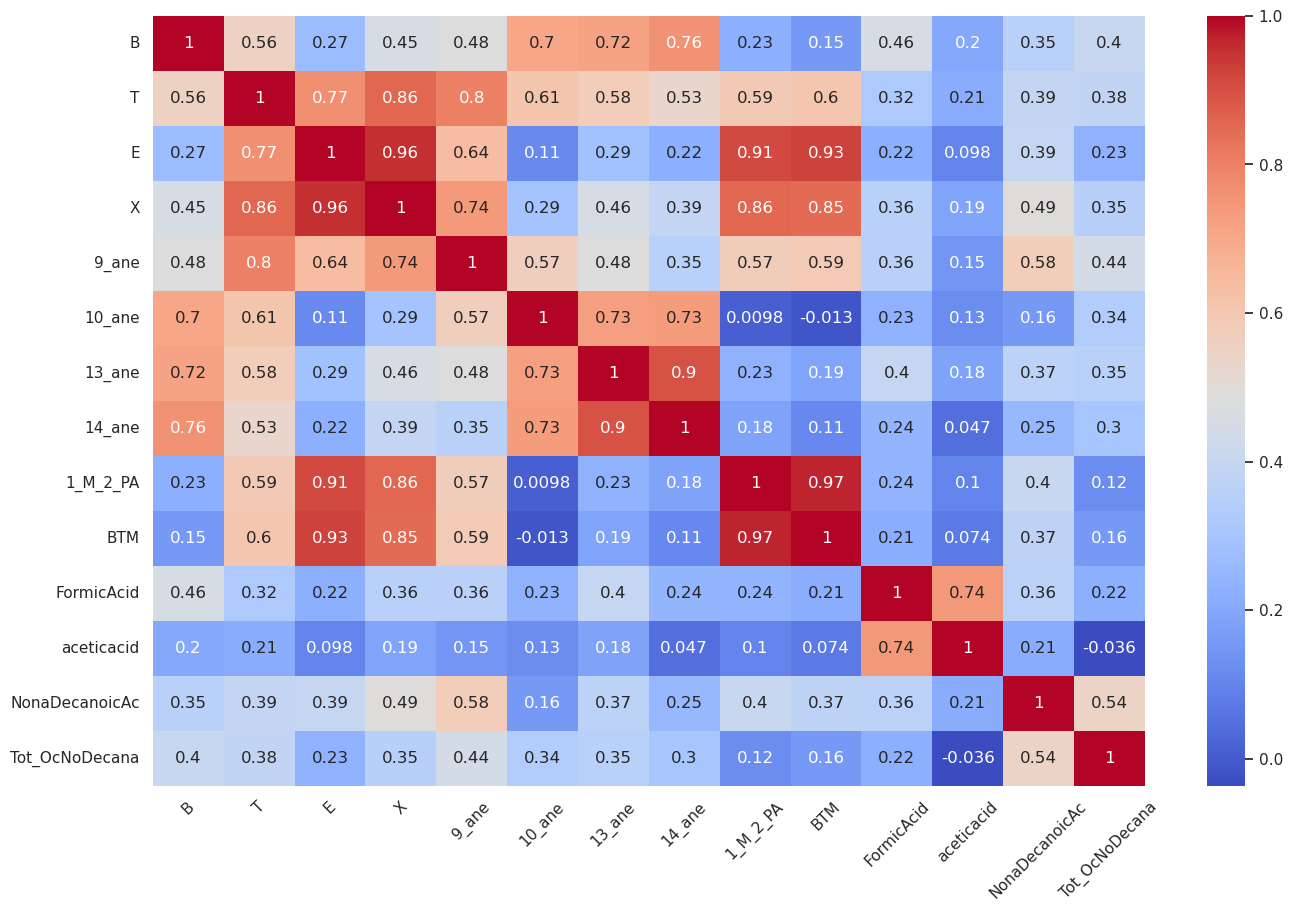

In [303]:
# For SAISON = hiver
data_hiver = data[data['SAISON'] == 'hiver']
numerical_data_hiver = data_hiver.select_dtypes(include=['float64', 'int64'])
corr_hiver = numerical_data_hiver.corr()
print("Saison = hiver")
plt.figure(figsize=(16, 10))
sns.heatmap(corr_hiver, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

Saison = été


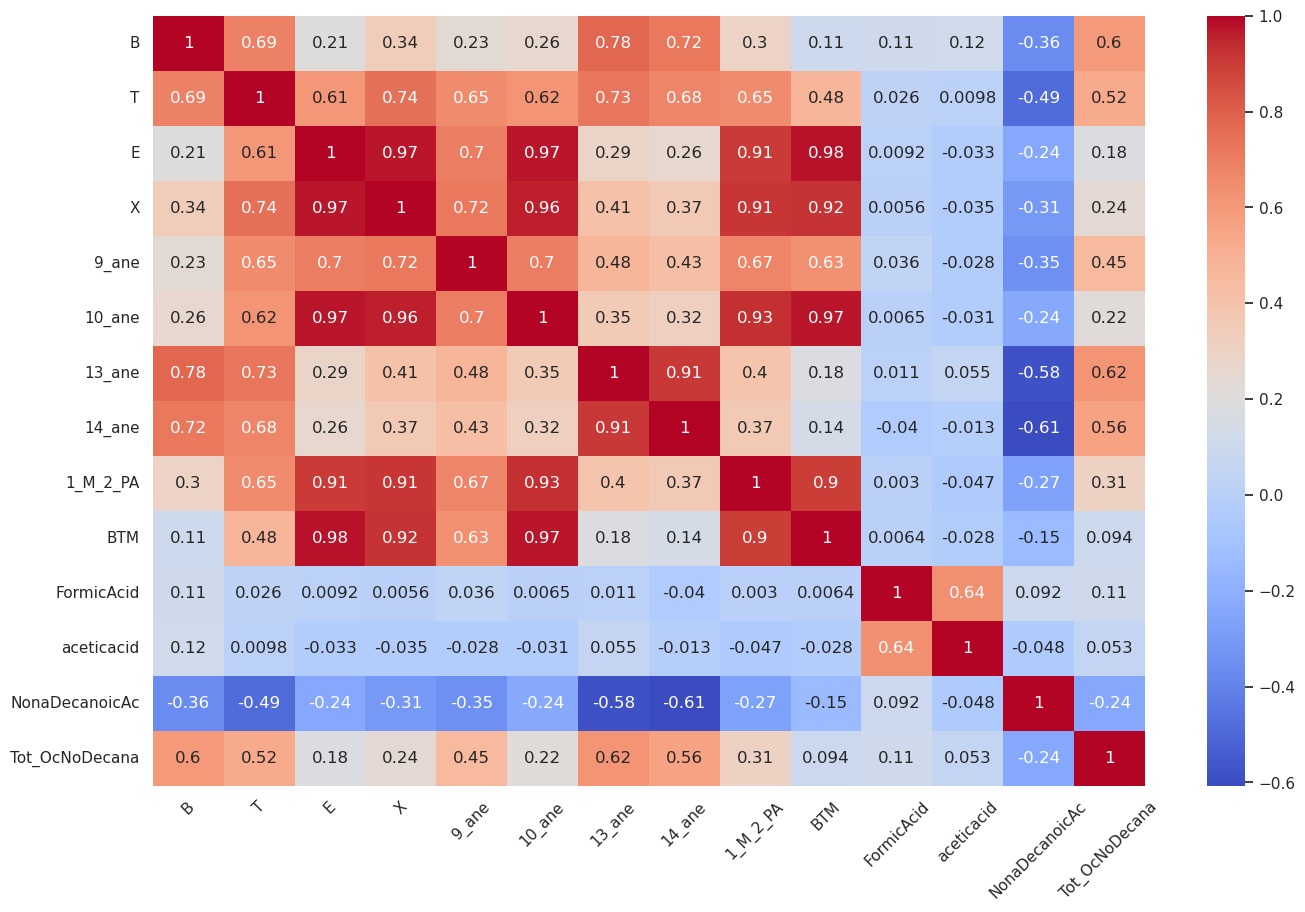

In [304]:
# For SAISON = été
data_ete = data[data['SAISON'] == 'été']
numerical_data_ete = data_ete.select_dtypes(include=['float64', 'int64'])
corr_ete = numerical_data_ete.corr()
print("Saison = été")
plt.figure(figsize=(16, 10))
sns.heatmap(corr_ete, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

Campagne = BF


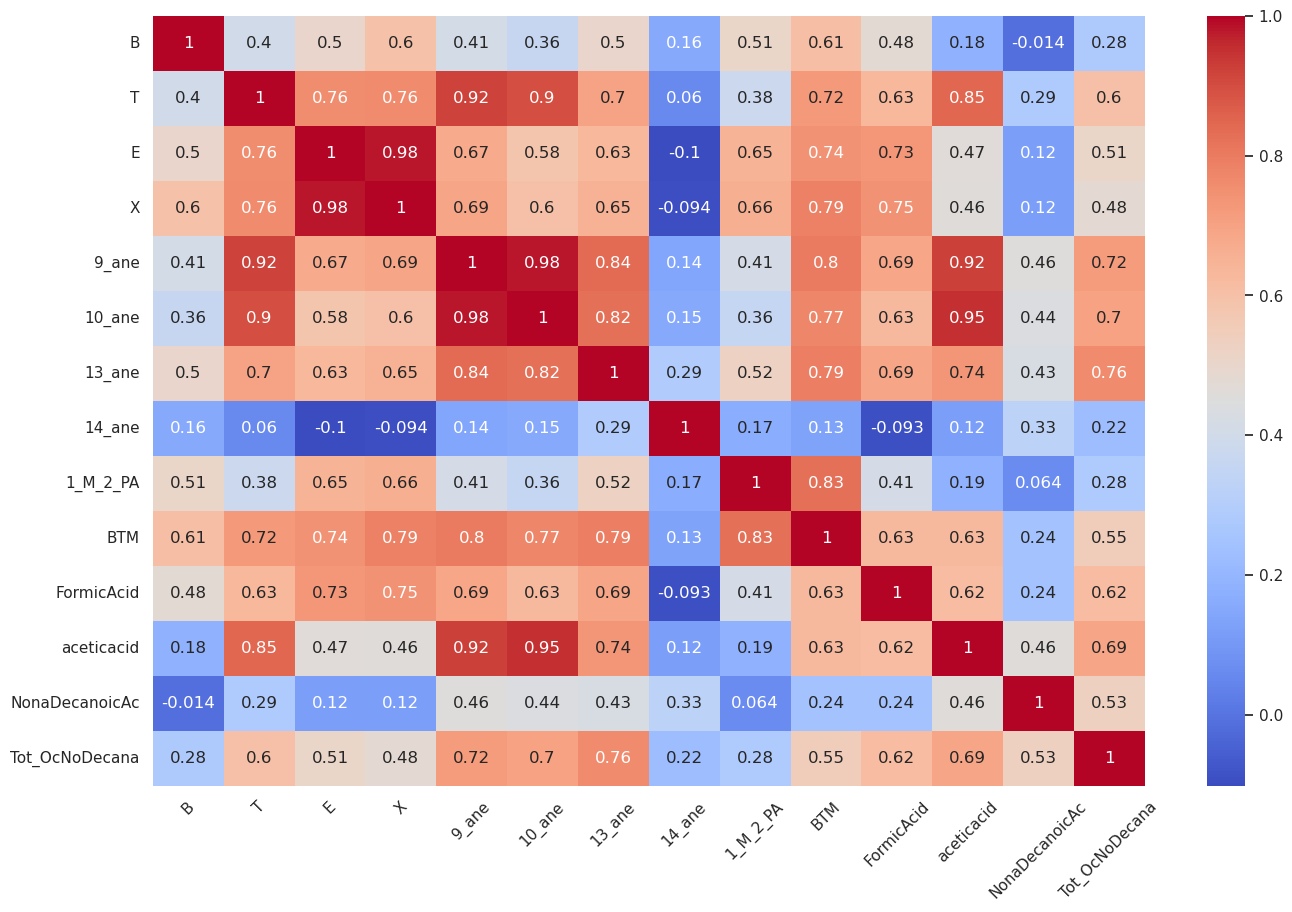

In [305]:
# For Campagne contains BF
data_BF = data[data['Campagne'].str.startswith("BF")]
numerical_data_BF = data_BF.select_dtypes(include=['float64', 'int64'])
corr_BF = numerical_data_BF.corr()
print("Campagne = BF")
plt.figure(figsize=(16, 10))
sns.heatmap(corr_BF, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

Campagne = CA


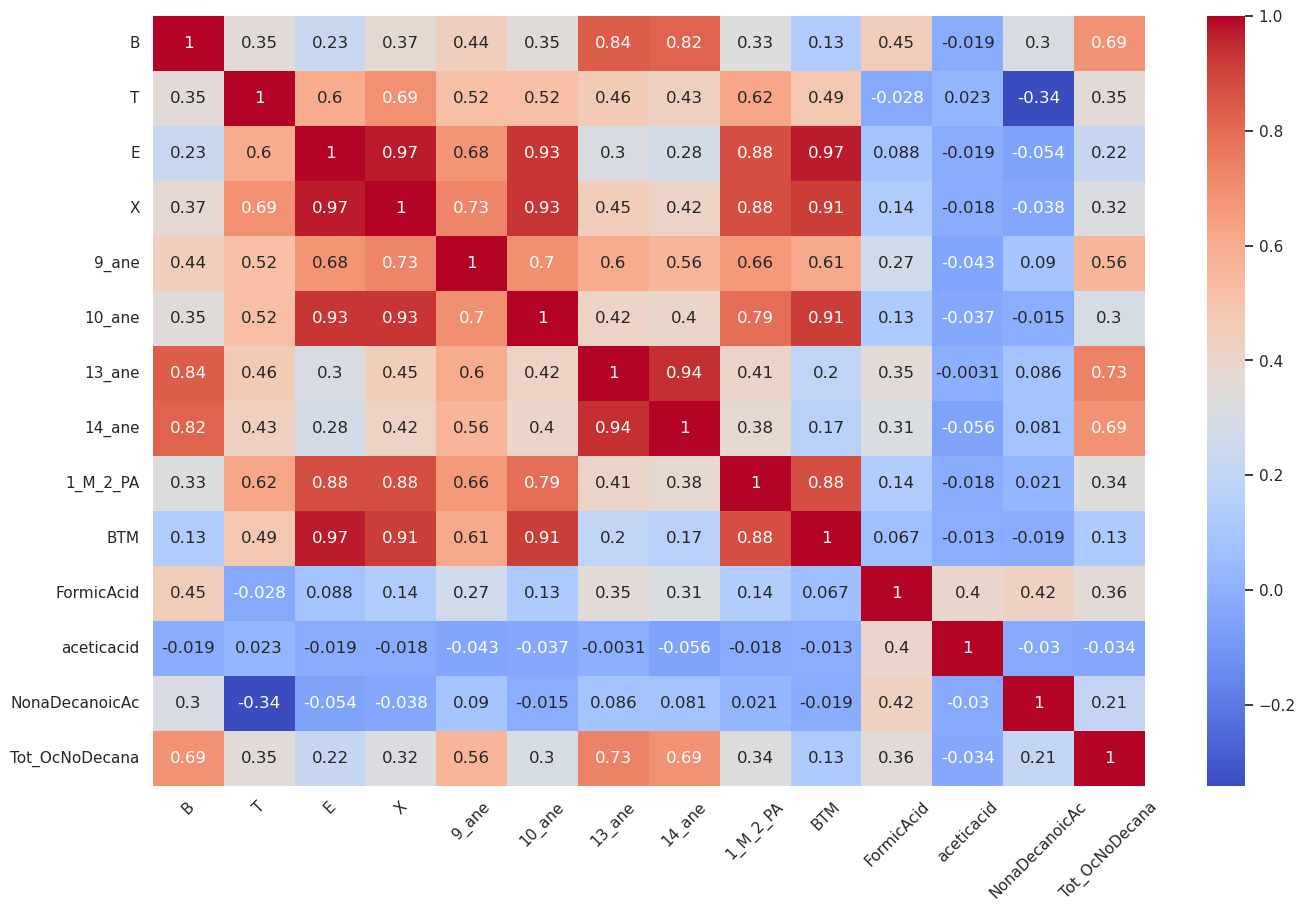

In [306]:
# For Campagne contains CA
data_CA = data[data['Campagne'].str.startswith("CA")]
numerical_data_CA = data_CA.select_dtypes(include=['float64', 'int64'])
corr_CA = numerical_data_CA.corr()
print("Campagne = CA")
plt.figure(figsize=(16, 10))
sns.heatmap(corr_CA, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

We notice a change in the correlations between variables from a period to the other, for instance, the correlation between 10-ane, and 1_M_2_PA and BTM, was almost 0 in the winter but became over 90% in the summer. Also the correlation between 14-ane and other chemical compounds was very small before the activity, and became quite considerable after the activity.

We also notice that the mean of the various features is higher in summer, and more variability (higher std) also appears during the summer which will affect PCA more.

Same thing can be said for when comparing before and after the activity.

In [307]:
# Center and reduce data with the StandardScaler() function
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numerical_data = scaler.fit_transform(numerical_data)

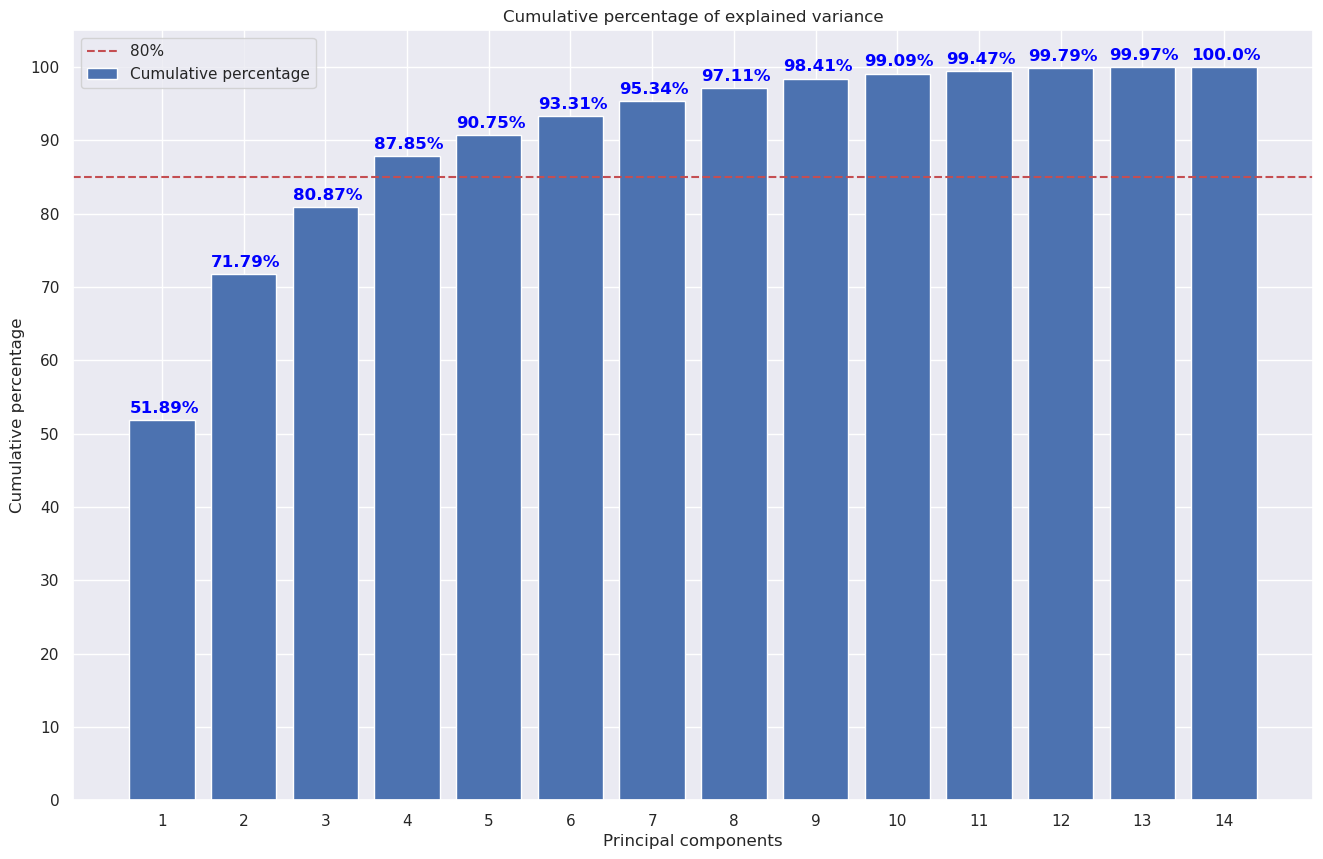

In [308]:
# PCA
pca = PCA()
pca.fit(numerical_data)

# Eigen values
eigen_values = pca.explained_variance_

percentage_contributions = eigen_values / sum(eigen_values) * 100

cumulative_percentage = np.cumsum(percentage_contributions)

plt.figure(figsize=(16, 10))
plt.bar(range(1, len(cumulative_percentage) + 1), cumulative_percentage, align='center', label='Cumulative percentage')
plt.axhline(y=85, color='r', linestyle='--', label='80%')
for i, v in enumerate(cumulative_percentage):
    plt.text(i+0.6, v + 1, str(round(v, 2)) + "%", color='blue', fontweight='bold')
plt.xlabel('Principal components')
plt.ylabel('Cumulative percentage')
plt.title('Cumulative percentage of explained variance')
plt.xticks(range(1, len(cumulative_percentage) + 1))
plt.yticks(np.arange(0, 101, 10))
plt.legend()
plt.show()


We can take up to 4 principal components, we will plot using 3 but do the analysis using 4.

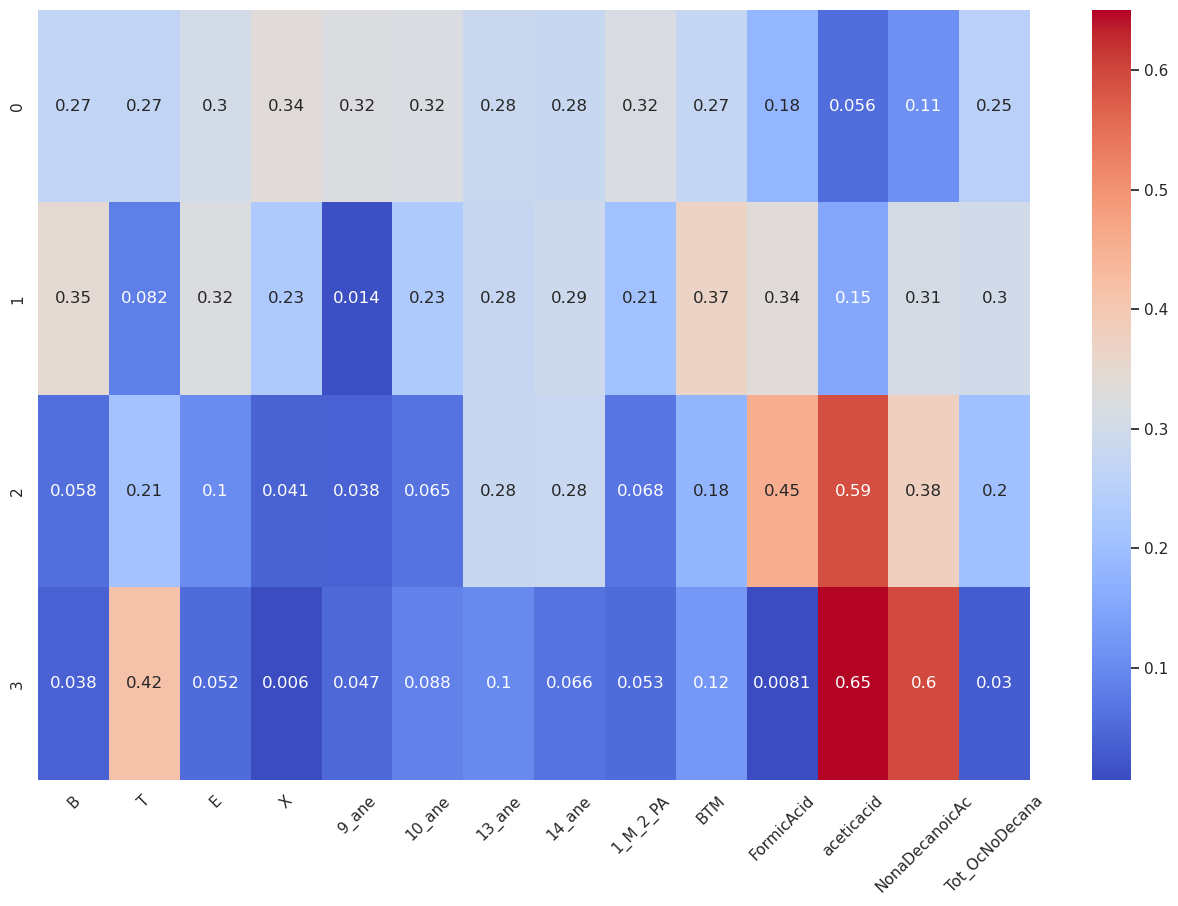

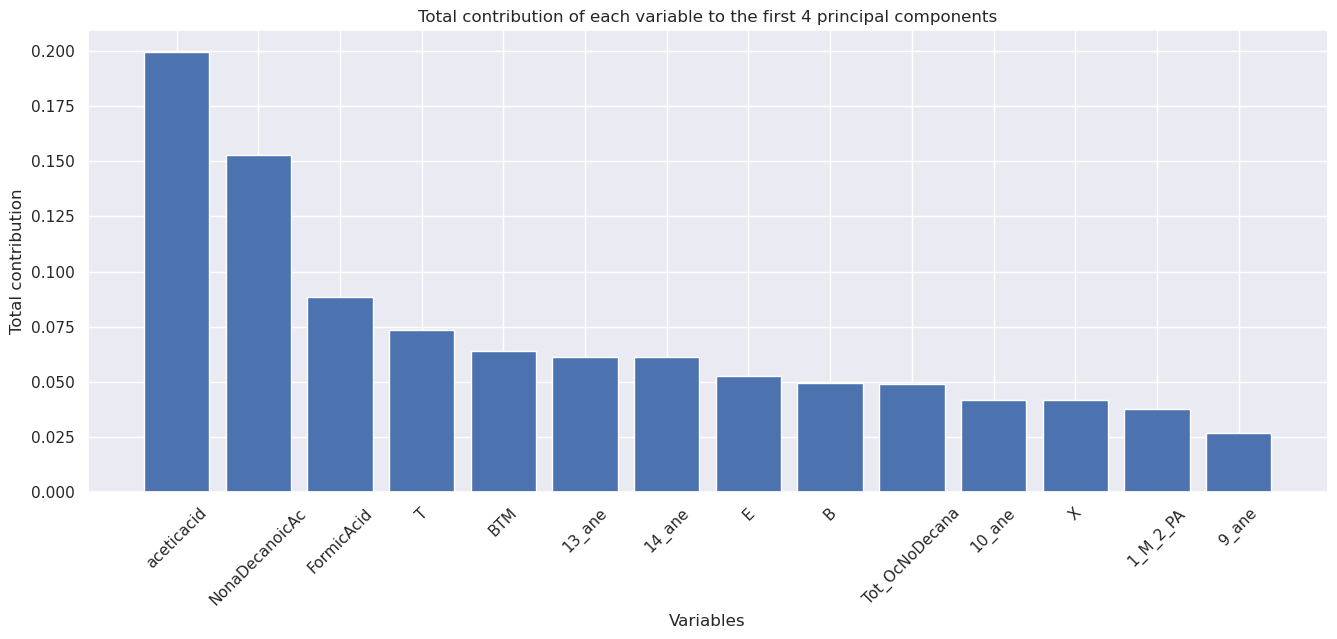

In [309]:
# How much of every variable is explained by the first 4 principal components?
eigen_vectors = pca.components_
eigen_vectors = pd.DataFrame(eigen_vectors, columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Heatmap of the first 4 principal components
plt.figure(figsize=(16, 10))
sns.heatmap(eigen_vectors.iloc[:4, :].abs(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

# Calculate the total contribution of each variable to the first 4 principal components
total_contribution = np.sum(np.square(eigen_vectors.iloc[:4, :]), axis=0)
total_contribution = pd.DataFrame(total_contribution, columns=['Total contribution'])
total_contribution.sort_values(by='Total contribution', ascending=False, inplace=True)
total_contribution['Total contribution'] = total_contribution['Total contribution'] / sum(total_contribution['Total contribution'])

plt.figure(figsize=(16, 6))
plt.bar(total_contribution.index, total_contribution['Total contribution'], align='center')
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Total contribution')
plt.title('Total contribution of each variable to the first 4 principal components')
plt.show()

Contribution of each variable to the principal components


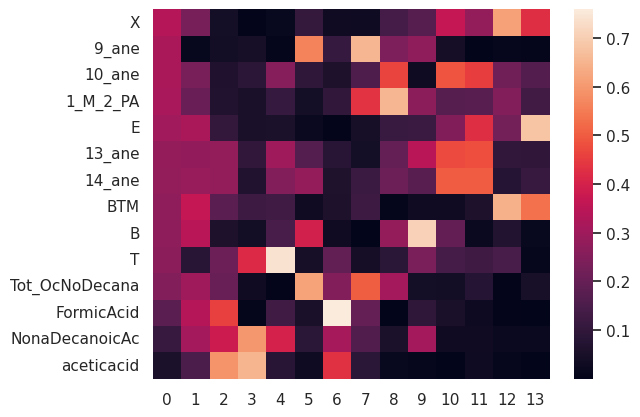

In [310]:
# Contribution of each variable to the principal components
variance_ratio = pca.explained_variance_ratio_

total_contributions = np.dot(np.abs(pca.components_), variance_ratio)

contributions = pd.DataFrame(pca.components_, columns=data.select_dtypes(include=['float64', 'int64']).columns)
contributions = contributions.transpose()
contributions = contributions.abs()
contributions = contributions.sort_values(by=0, ascending=False)

print('Contribution of each variable to the principal components')
plt.figure()
sns.heatmap(contributions)
plt.show()

In [311]:
# Projection on 4 components
pca = PCA(n_components=4)
pca.fit(numerical_data)
pca.components_

# Plot the projection in 3D
pca_data = pca.transform(numerical_data)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Quality of the projections
coord_squared = np.sum(pca_data ** 2, axis=1)
old_coord_squared = np.sum(numerical_data ** 2, axis=1)

quality = coord_squared / old_coord_squared
print("Quality of the projections (sorted):")
print(quality.sort_values(ascending=False))

Quality of the projections (sorted):
75     0.993252
3      0.988020
32     0.987438
2      0.985356
19     0.983339
         ...   
45     0.343512
123    0.329829
37     0.259235
127    0.131522
114    0.047059
Length: 138, dtype: float64


In [312]:
# Calculate the number of individuals with a quality of projection greater than 0.8
print("Precentage of individuals with a quality of projection greater than 0.8:")
print(sum(quality >= 0.8) / len(quality) * 100)

Precentage of individuals with a quality of projection greater than 0.8:
71.01449275362319


In [313]:
# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(numerical_data)
pca.components_

# Plot the projection in 3D
pca_data = pca.transform(numerical_data)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(pca_data, x='PC1', y='PC2', z='PC3', opacity=0.3)
fig.show()

From the results above, we can conclude:
- It's hard to make sense of principal components.
- The PCA is heavily affected by the difference between winter/summer and before/after: the higher variance in the summer / after, so the principal components are likely to be dominated by the patterns and variations in those periods. Hence, we're not able to find a _signature_ for each period.


While normalization helps in putting variables on the same scale, it might not be sufficient here seeing there are substantial differences in variability between seasons and before and after the activity.


A possible solution would be to perform a seasonal separation, doing so could provide more interpretable results: we may apply a PCA on variables over the _same season_, before and after the activity, and figure out the axis with the most variance, this would be much more interpretable than taking the lot of the variables. This may be further applied to different variables, like the `TYPE`.